# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 25.09.2022

Мягкий дедлайн: 23:59MSK 16.10.2022

Жесткий дедлайн: 23:59MSK 23.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [216]:
!pip install folium

In [217]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

### Задание 1 (1 балл)
Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [219]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# грузим библиотечку, отвечающую за выгрузку данных из kaggle 
# (инструкция: https://medium.com/nuances-of-programming/%D0%BA%D0%B0%D0%BA-%D0%B8%D0%BC%D0%BF%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D1%82%D1%8C-%D0%BD%D0%B0%D0%B1%D0%BE%D1%80%D1%8B-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85-kaggle-%D0%B2-google-colab-51de3fd5a9a8)

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download nyc-taxi-trip-duration
! kaggle competitions download nyc-taxi-trip-duration -f train.csv


mkdir: /Users/isupport/.kaggle: File exists
nyc-taxi-trip-duration.zip: Skipping, found more recently modified local copy (use --force to force download)
404 - Not Found


In [220]:
# скачиваем и разархивируем zip

import zipfile
archive = 'nyc-taxi-trip-duration.zip'
with zipfile.ZipFile(archive, 'r') as zip_file:
    zip_file.extractall('/Users/isupport/1 Машинка ФТИАД/ДЗ2')

# внутри одного zip оказалось несколько zip (train, test и sample_submission) - разархивируем их тоже. Получим 3 csv файла

archive = 'train.zip'
with zipfile.ZipFile(archive, 'r') as zip_file:
    zip_file.extractall('/Users/isupport/1 Машинка ФТИАД/ДЗ2')

archive = 'test.zip'
with zipfile.ZipFile(archive, 'r') as zip_file:
    zip_file.extractall('/Users/isupport/1 Машинка ФТИАД/ДЗ2')

archive = 'sample_submission.zip'
with zipfile.ZipFile(archive, 'r') as zip_file:
    zip_file.extractall('/Users/isupport/1 Машинка ФТИАД/ДЗ2')

In [221]:
# наконец открываем train.csv

df_train = pd.read_csv('train.csv')
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [222]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

# удалили колонку dropoff_datetime
df_train = df_train.drop(columns = 'dropoff_datetime')

# преобразуемс pickup_datetime в datetime объекты
from datetime import datetime
df_train['pickup_datetime']= pd.to_datetime(df_train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df_train.info() #-> Превратили в datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 111.3+ MB


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

/Users/isupport/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

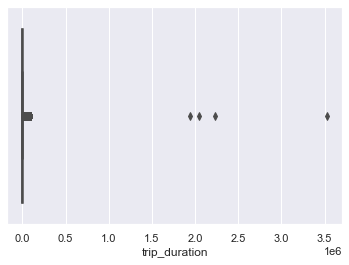

In [223]:
# внимательно смотрим на данные и активно возмущаемся наличием выбросов

sns.boxplot(df_train['trip_duration'])

In [224]:
# удалим выбросы как профессионалы 
#np.quantile(df_train['trip_duration'], 0.95) == 0.584 часа, по сути пол часа - все что больше - удаляем

df_train = df_train[df_train['trip_duration'] < np.quantile(df_train['trip_duration'], 0.90)].reset_index(drop=True)
df_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
3,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
4,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,443
...,...,...,...,...,...,...,...,...,...,...
1312666,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1312667,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1312668,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1312669,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


/Users/isupport/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

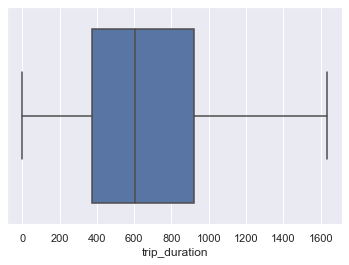

In [225]:
# итого видим красоту юхуууу
sns.boxplot(df_train['trip_duration'])

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

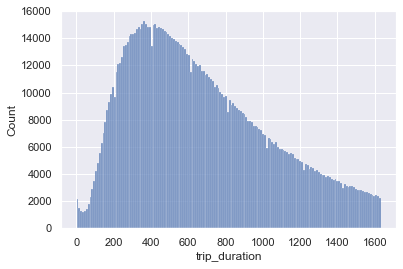

In [226]:
sns.histplot(x=df_train['trip_duration'])

#### Вопрос
Что можно сказать о целевой переменной по гистограмме её значений?<br>
<span style="color:green"> Целевая переменная распределена не нормально, в основном значения менее 5000 сек (предполагается, что есть выбросы, так как значения в 80000 секунд (~22 часа) логично, что встречаются редко
</span>

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

#### Вопрос
Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

<span style="color:green"> $$\text{MSE}(a, X) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(a(x_i) - y_i\big)^2$$ <br> 
    За счёт логарифмирования ответов и прогнозов мы скорее штрафуем за отклонения в порядке величин, чем за отклонения в их значениях. Также логарифм не является симметричной функцией, и поэтому данная функция потерь штрафует заниженные прогнозы сильнее, чем завышенные.
    <br>
    В том числе логарифмироване значений полезнее при выбросах (не так сильно реагирует на них)<br>
    И в конце концов логарифмирование позволит привести графичек к нормальному виду (к норм распределению)
</span>

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

#### Вопрос 
Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

##### Доказательство
╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<span style="color:green"> 
    $$\text{MSE}(a, X) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(a(x_i) - y_i\big)^2$$ <br> 
</span>
<span style="color:green"> 
    $$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$ <br> 
    $a(x_i) = \exp(\hat{a}(x_i)) - 1 \Rightarrow \hat{a}(x_i)) = \log{(a(x_i) +1)}$ <br>
    $$\text{MSE}(a, X) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat a(x_i) - \hat y_i\big)^2 = \frac{1}{\ell}\sum_{i=1}^{\ell} \big( \log{(a(x_i) +1)} - \log{(y_i +1)}\big)^2 $$<br>
    И так как функции корня и MSE обе монотонны, преобразования эквивалентны
</span>

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [227]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

df_train['log_trip_duration'] = np.log1p(df_train[['trip_duration']])
df_train = df_train.drop(columns = 'trip_duration')
df_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
3,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642
4,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,6.095825
...,...,...,...,...,...,...,...,...,...,...
1312666,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011
1312667,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161
1312668,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876
1312669,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256


Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [228]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# берем только циферки
numeric_data = df_train.select_dtypes([np.number])
numeric_features = numeric_data.columns
#numeric_features

# выгружаем библиотечки, строим линейную модель самую простую
# предсказываем нужную нам величину (логарифмы продолжительности поездки) и считаем RMSLE

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

model = LinearRegression()
model.fit(df_train[numeric_features], df_train[['log_trip_duration']])
y_train_pred = model.predict(df_train[numeric_features])

print("Train RMSLE = ", np.sqrt(mean_squared_log_error(df_train[['log_trip_duration']], y_train_pred)))

Train RMSLE =  4.984877398662362e-16


## Часть 1. Изучаем `pickup_datetime` (2 балла)

### Задание 2 (0.25 баллов)
Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [229]:
df_train_date = df_train.copy()
df_train_date["Date"] = df_train_date["pickup_datetime"].dt.date
df_train_date = df_train_date[['Date']].sort_values(by = 'Date').reset_index(drop=True)
df_train_date

,Date
0,2016-01-01
1,2016-01-01
2,2016-01-01
3,2016-01-01
4,2016-01-01
...,...
1312666,2016-06-30
1312667,2016-06-30
1312668,2016-06-30
1312669,2016-06-30


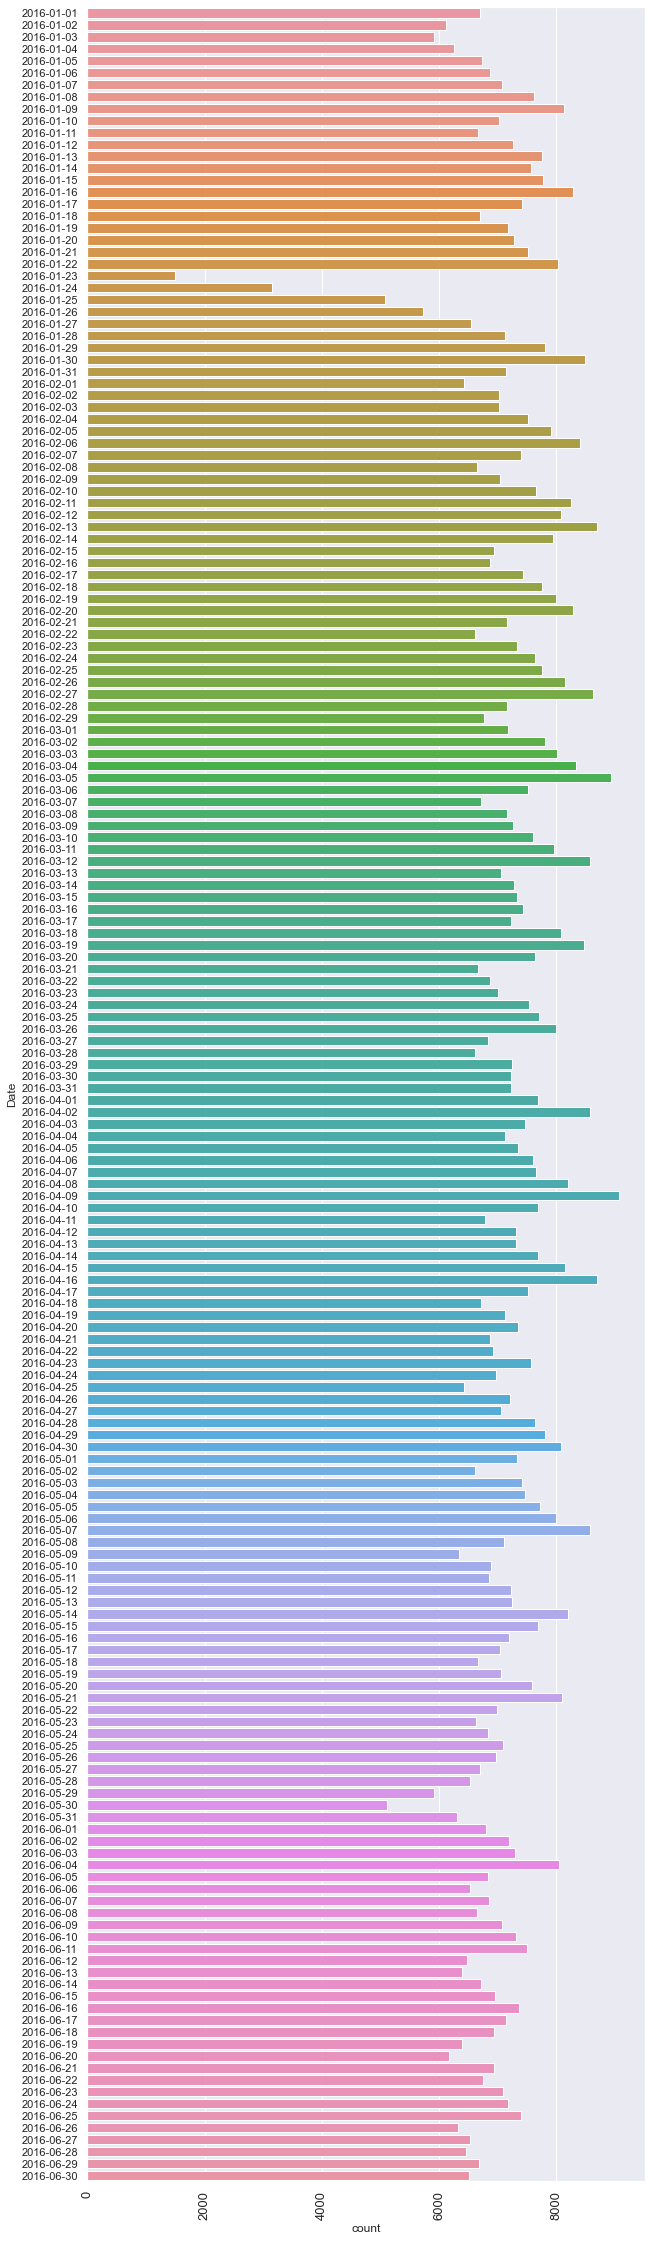

In [230]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# а теперь смотрим на магию в seaborn
plt.figure(figsize =(10, 40))

sns.countplot(data=df_train_date, y='Date')

plt.xticks(rotation=90, fontsize = 13)
plt.show()

#### Вопрос
Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

<span style="color:green"> 
    С 23 по 25 января 2016 года исходя из таблицы выше было минимальное количество поездок <br> 
    Почему? Потому что в тот период Нью-Йорк накрыла снежная буря и власти города запретили движение автомобилей по городу <br> 
    Еще 30 мая 2016 поездок меньше, чем обычно, это может быть связано с терактом (хотя слабо может повлиять на рынок такси)
</span>

[🔗Ссылочка на новость января 2016](https://ria.ru/20160123/1364032228.html)<br> 
[🔗Ссылочка на вторую новость, май 2016](https://tass.ru/proisshestviya/3324970)

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [231]:
# подтянем день недели по дате (не подтянем - опять ничего не работает)

df_train_date_time = df_train.copy()
df_train_date_time["Date"] = df_train_date_time["pickup_datetime"].dt.date
df_train_date_time["Time"] = df_train_date_time["pickup_datetime"].dt.time
df_train_date_time = df_train_date_time[['pickup_datetime', 'Date', 'Time']].sort_values(by = ['Date', 'Time']).reset_index(drop=True)

df_train_date_time

,pickup_datetime,Date,Time
0,2016-01-01 00:00:17,2016-01-01,00:00:17
1,2016-01-01 00:00:53,2016-01-01,00:00:53
2,2016-01-01 00:01:01,2016-01-01,00:01:01
3,2016-01-01 00:01:14,2016-01-01,00:01:14
4,2016-01-01 00:01:20,2016-01-01,00:01:20
...,...,...,...
1312666,2016-06-30 23:58:38,2016-06-30,23:58:38
1312667,2016-06-30 23:58:47,2016-06-30,23:58:47
1312668,2016-06-30 23:58:52,2016-06-30,23:58:52
1312669,2016-06-30 23:59:09,2016-06-30,23:59:09


In [232]:
# добавили день недели
df_train_date_time['weekday'] = df_train_date_time['pickup_datetime'].dt.day_name()
df_train_date_time

,pickup_datetime,Date,Time,weekday
0,2016-01-01 00:00:17,2016-01-01,00:00:17,Friday
1,2016-01-01 00:00:53,2016-01-01,00:00:53,Friday
2,2016-01-01 00:01:01,2016-01-01,00:01:01,Friday
3,2016-01-01 00:01:14,2016-01-01,00:01:14,Friday
4,2016-01-01 00:01:20,2016-01-01,00:01:20,Friday
...,...,...,...,...
1312666,2016-06-30 23:58:38,2016-06-30,23:58:38,Thursday
1312667,2016-06-30 23:58:47,2016-06-30,23:58:47,Thursday
1312668,2016-06-30 23:58:52,2016-06-30,23:58:52,Thursday
1312669,2016-06-30 23:59:09,2016-06-30,23:59:09,Thursday


In [233]:
df_train_date_time_fig1 = df_train_date_time.groupby(['weekday']).count()[['Date']]
df_train_date_time_fig1 = df_train_date_time_fig1.rename(columns = {'Date': 'Count'}).reset_index()
df_train_date_time_fig1

,weekday,Count
0,Friday,199332
1,Monday,169913
2,Saturday,203736
3,Sunday,180005
4,Thursday,192197
5,Tuesday,181333
6,Wednesday,186155


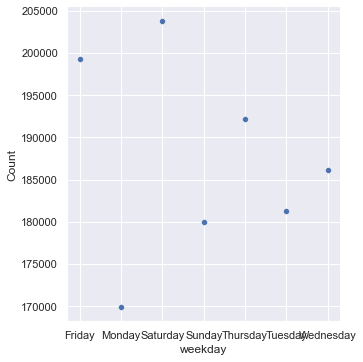

In [234]:
# графичек
sns.relplot(data=df_train_date_time_fig1, x = 'weekday', y = 'Count')

<span style="color:green"> 
    Самый популярный день для поездок это воскресенье - предположительно потому что люди хотят отдохнуть от вождения или <br> 
    выбираются и перемещаются чаще по городу по делам или развлечениям. В будни обычно с работы и на работу<br> 
    Также популярна пятница, наверное потому что вечер пятницы полон приключений (есть тенденция отдыхать в пятницу <br>
    после работы, так как в субботу никуда не надо
</span>

In [235]:
df_train_date_time_fig2 = df_train_date_time.groupby(['Date']).count()[['Time']].rename(columns = {'Time': 'Count'}).reset_index()
df_train_date_time_fig2

,Date,Count
0,2016-01-01,6701
1,2016-01-02,6122
2,2016-01-03,5916
3,2016-01-04,6246
4,2016-01-05,6723
...,...,...
177,2016-06-26,6324
178,2016-06-27,6531
179,2016-06-28,6466
180,2016-06-29,6681


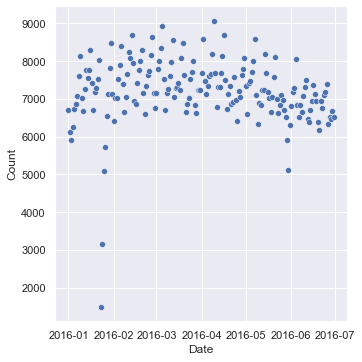

In [236]:
sns.relplot(data=df_train_date_time_fig2, x = 'Date', y = 'Count')

In [237]:
df_train_date_time_fig3 = df_train_date_time.copy()
df_train_date_time_fig3['hour_of_the_day']=df_train_date_time_fig3['pickup_datetime'].dt.hour
df_train_date_time_fig3 = df_train_date_time_fig3.groupby(['hour_of_the_day']).count()[['Time']].rename(columns = {'Time': 'Count'}).reset_index()
df_train_date_time_fig3

,hour_of_the_day,Count
0,0,49017
1,1,36174
2,2,26590
3,3,19872
4,4,14800
5,5,13748
6,6,30877
7,7,51454
8,8,60646
9,9,60731


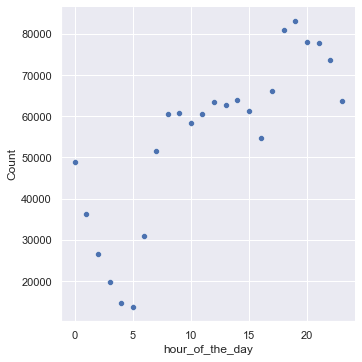

In [238]:
# графичек
sns.relplot(data=df_train_date_time_fig3, x = 'hour_of_the_day', y = 'Count')

<span style="color:green"> 
    Самые популярные часы для поездок - часы бодрствования. Отдельно выделяется 19-20 часов вечера, отчасти потому что вечером уставшие люди хотят поехать домой на такси (или после работы поехать не домой)
</span>

### Задание 3 (0.5 баллов)
Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [352]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train_date_time_fig4 = df_train_date_time.copy()
df_train_date_time_fig4['hour_of_the_day']=df_train_date_time_fig4['pickup_datetime'].dt.hour
df_train_date_time_fig4['month']=df_train_date_time_fig4['pickup_datetime'].dt.month
df_train_date_time_fig4

,pickup_datetime,Date,Time,weekday,hour_of_the_day,month
0,2016-01-01 00:00:17,2016-01-01,00:00:17,Friday,0,1
1,2016-01-01 00:00:53,2016-01-01,00:00:53,Friday,0,1
2,2016-01-01 00:01:01,2016-01-01,00:01:01,Friday,0,1
3,2016-01-01 00:01:14,2016-01-01,00:01:14,Friday,0,1
4,2016-01-01 00:01:20,2016-01-01,00:01:20,Friday,0,1
...,...,...,...,...,...,...
1312666,2016-06-30 23:58:38,2016-06-30,23:58:38,Thursday,23,6
1312667,2016-06-30 23:58:47,2016-06-30,23:58:47,Thursday,23,6
1312668,2016-06-30 23:58:52,2016-06-30,23:58:52,Thursday,23,6
1312669,2016-06-30 23:59:09,2016-06-30,23:59:09,Thursday,23,6


In [353]:
df_train_date_time_fig5 = df_train_date_time_fig4.groupby(['month', 'hour_of_the_day']).count()[['Time']].rename(columns = {'Time': 'Count'}).reset_index()
df_train_date_time_fig5

,month,hour_of_the_day,Count
0,1,0,7816
1,1,1,6010
2,1,2,4580
3,1,3,3381
4,1,4,2428
...,...,...,...
139,6,19,12836
140,6,20,11869
141,6,21,12581
142,6,22,12068


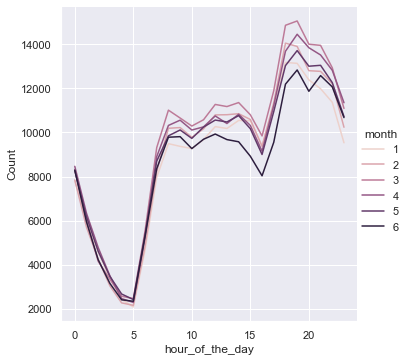

In [355]:
sns.relplot(data=df_train_date_time_fig5, x = 'hour_of_the_day', y = 'Count', hue = 'month', kind = 'line')

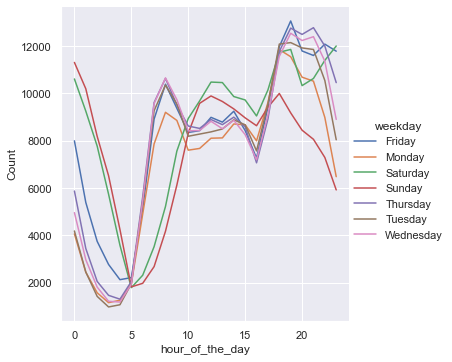

In [356]:
df_train_date_time_fig6 = df_train_date_time_fig4.groupby(['weekday', 'hour_of_the_day']).count()[['Time']].rename(columns = {'Time': 'Count'}).reset_index()
df_train_date_time_fig6
sns.relplot(data=df_train_date_time_fig6, x = 'hour_of_the_day', y = 'Count', hue = 'weekday', kind = 'line')

#### Вопрос
Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?<br>

<span style="color:green"> 
    Под графиками интерпретации и выводы описаны <br>
    По последнему графику можно сказать: во-первых, тенденция увеличенного количества поездок в часы бодрствования остаются<br>
    во-вторых, можно заметить, что в3-4 месяцах (март-апрель) наибольшее количество поездок, а в июне наименьшее, что может быть следствием того, что при потеплении такси меньше пользуется спросом или в теплое врмя года больше населения нью-йорка берет отпуск и/или уезжает загород <br>
    Из логики второго пункта выбивается январь, но это можно объяснить количеством населения на отдыхе (если у них как и у россиян есть тенденция брать отпуск и улетать в теплые страны зимой и сессия попадает на январь (или любые учебные каникулы))
</span>

###  Задание 4 (0.5 баллов) 
Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [242]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.model_selection import train_test_split

df_train_delim = df_train.copy()
df_train_delim = df_train_delim.drop(columns=["id"])

y = df_train_delim[["log_trip_duration"]]
X = df_train_delim.drop(columns="log_trip_duration")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [243]:
xy_train = X_train.merge(y_train, how = 'left', left_index=True, right_index=True)
xy_test = X_test.merge(y_test, how = 'left', left_index=True, right_index=True) #на всякий
xy_train

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
670840,2,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,N,6.939254
450733,2,2016-01-25 21:09:46,1,-73.982651,40.763981,-73.973862,40.748676,N,6.838405
143827,1,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,N,6.448889
425072,1,2016-04-01 22:49:48,1,-73.987083,40.752270,-73.988304,40.745663,N,6.169611
494431,1,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,N,6.216606
...,...,...,...,...,...,...,...,...,...
1157021,1,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,N,6.882437
804336,1,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,N,6.886532
1154171,1,2016-06-08 05:32:30,1,-73.966080,40.793144,-73.871445,40.774345,N,6.946014
617841,1,2016-03-30 09:13:29,1,-73.991096,40.731438,-73.955040,40.764961,N,7.063904


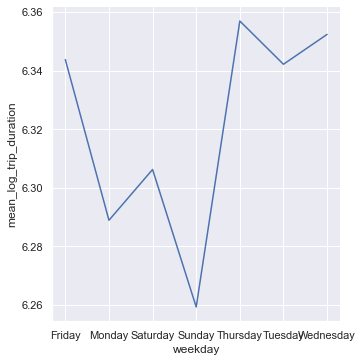

In [244]:
xy_train['weekday'] = xy_train['pickup_datetime'].dt.day_name()
xy_train_time_fig1 = xy_train.groupby(['weekday']).mean()[['log_trip_duration']].rename(columns = {'log_trip_duration': 'mean_log_trip_duration'}).reset_index()
sns.relplot(data=xy_train_time_fig1, x = 'weekday', y = 'mean_log_trip_duration', kind = 'line')

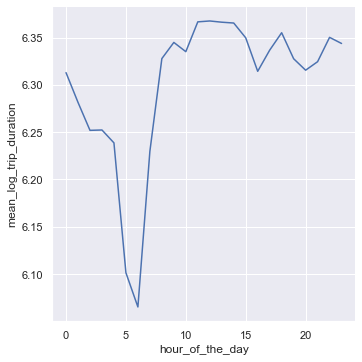

In [245]:
xy_train['hour_of_the_day'] = xy_train['pickup_datetime'].dt.hour
xy_train_time_fig2 = xy_train.groupby(['hour_of_the_day']).mean()[['log_trip_duration']].rename(columns = {'log_trip_duration': 'mean_log_trip_duration'}).reset_index()
sns.relplot(data=xy_train_time_fig2, x = 'hour_of_the_day', y = 'mean_log_trip_duration', kind = 'line')


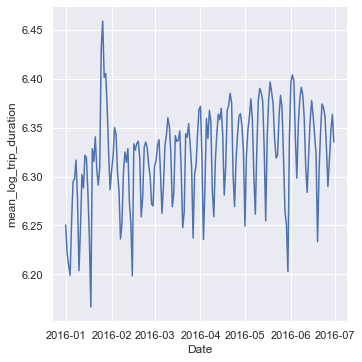

In [246]:
xy_train["Date"] = xy_train["pickup_datetime"].dt.date
xy_train_time_fig2 = xy_train.groupby(['Date']).mean()[['log_trip_duration']].rename(columns = {'log_trip_duration': 'mean_log_trip_duration'}).reset_index()
sns.relplot(data=xy_train_time_fig2, x = 'Date', y = 'mean_log_trip_duration', kind = 'line')

#### Вопрос 
Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему?<br>
<span style="color:green"> 
    В зависимости от даты - графики таргета и количества поездок аналогичны. Предположительно, из-за того, что в даты, в которые население совершает бОльшее количество поездок, поездки более необходимы, поэтому и продолжительность поездок больше. Или потому что чем больше поездок, тем выше уровень пробок в городе и, соответственно, дольше ехать.
</span>
<br>
Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит?
<br>
<span style="color:green">
    Средний таргет также уменьшается
    Выше обсудили, что один из аномальных периодов соответствует объявлению о запрете автомобильного движения в связи с сильным снегопадом, а второй, менее выраженный, соответствует теракту (стрельба)
    Это может быть следствием того, что если поездок меньше - то можн быстрее добраться до конечной точки из-за отсутствия пробок
</span>
<br>
Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?<br>
<span style="color:green"> 
    Слабо заметна возрастающая тенденция ближе к середине года
</span>

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [247]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# день недели уже создан (weekday), час тоже (hour_of_the_day)

# месяц
xy_train['month']=xy_train['pickup_datetime'].dt.month
xy_train['Date']=xy_train['pickup_datetime'].dt.date

# номер дня в году
num_day_help = xy_train[['Date']].copy()
num_day_help = num_day_help.groupby(['Date']).sum().reset_index().sort_values(by = 'Date')
num_day_help = num_day_help.set_index(np.arange(1, len(num_day_help)+1)).reset_index().rename(columns = {'index': 'num_columns'})
xy_train = xy_train.merge(num_day_help, how = 'left', on = 'Date')

# аномальность периода
from datetime import date
xy_train['first_anomal'] = np.where(xy_train['Date'] == date(2016, 1, 23), 1, 0)
xy_train['second_anomal'] = np.where(xy_train['Date'] == date(2016, 5, 30), 1, 0)

In [248]:
xy_train[['first_anomal', 'second_anomal']].value_counts().to_frame()

0
first_anomal second_anomal        
0            0              914215
             1                3599
1            0                1055

In [249]:
xy_train

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,weekday,hour_of_the_day,Date,month,num_columns,first_anomal,second_anomal
0,2,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,N,6.939254,Saturday,8,2016-01-30,1,30,0,0
1,2,2016-01-25 21:09:46,1,-73.982651,40.763981,-73.973862,40.748676,N,6.838405,Monday,21,2016-01-25,1,25,0,0
2,1,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,N,6.448889,Tuesday,10,2016-04-12,4,103,0,0
3,1,2016-04-01 22:49:48,1,-73.987083,40.752270,-73.988304,40.745663,N,6.169611,Friday,22,2016-04-01,4,92,0,0
4,1,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,N,6.216606,Friday,20,2016-05-27,5,148,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918864,1,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,N,6.882437,Wednesday,15,2016-01-13,1,13,0,0
918865,1,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,N,6.886532,Tuesday,17,2016-04-26,4,117,0,0
918866,1,2016-06-08 05:32:30,1,-73.966080,40.793144,-73.871445,40.774345,N,6.946014,Wednesday,5,2016-06-08,6,160,0,0
918867,1,2016-03-30 09:13:29,1,-73.991096,40.731438,-73.955040,40.764961,N,7.063904,Wednesday,9,2016-03-30,3,90,0,0


Итак, мы уже создали некоторое количество признаков.

#### Вопрос
Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему? <br>
<span style="color:green"> 
    Как категориальные можно рассмотреть дни недели (воскресенье само по себе не больше понедельника)<br>
    Остальные можно считать за численные (несмотря на то что численно номер вендора не гооврит о его значимости - при выяснении зависимости, что чем больше номер вендора, тем дольше поездки, то можно сказать что у второго вендора могут быть особенности, приводящие к увеличению длительности поездки)
</span>

### Задание 5 (0.75 баллов) 
Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [250]:
# добавим к test те же признаки

X_test_cutted = X_test.copy()
X_test_cutted['weekday'] = X_test_cutted['pickup_datetime'].dt.day_name()
X_test_cutted['hour_of_the_day'] = X_test_cutted['pickup_datetime'].dt.hour
X_test_cutted['month']=X_test_cutted['pickup_datetime'].dt.month
X_test_cutted["Date"] = X_test_cutted["pickup_datetime"].dt.date
X_test_cutted['first_anomal'] = np.where(X_test_cutted['Date'] == date(2016, 1, 23), 1, 0)
X_test_cutted['second_anomal'] = np.where(X_test_cutted['Date'] == date(2016, 5, 30), 1, 0)

num_day_help1 = X_test_cutted[['Date']].copy()
num_day_help1 = num_day_help1.groupby(['Date']).sum().reset_index().sort_values(by = 'Date')
num_day_help1 = num_day_help1.set_index(np.arange(1, len(num_day_help)+1)).reset_index().rename(columns = {'index': 'num_columns'})
X_test_cutted = X_test_cutted.merge(num_day_help1, how = 'left', on = 'Date')
X_test_cutted = X_test_cutted[['weekday', 'month', 'hour_of_the_day', 'first_anomal', 'second_anomal', 'num_columns']]

In [251]:
xy_train#[['weekday', 'month', 'hour_of_the_day', 'first_anomal', 'second_anomal', 'num_columns']]

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,weekday,hour_of_the_day,Date,month,num_columns,first_anomal,second_anomal
0,2,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,N,6.939254,Saturday,8,2016-01-30,1,30,0,0
1,2,2016-01-25 21:09:46,1,-73.982651,40.763981,-73.973862,40.748676,N,6.838405,Monday,21,2016-01-25,1,25,0,0
2,1,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,N,6.448889,Tuesday,10,2016-04-12,4,103,0,0
3,1,2016-04-01 22:49:48,1,-73.987083,40.752270,-73.988304,40.745663,N,6.169611,Friday,22,2016-04-01,4,92,0,0
4,1,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,N,6.216606,Friday,20,2016-05-27,5,148,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918864,1,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,N,6.882437,Wednesday,15,2016-01-13,1,13,0,0
918865,1,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,N,6.886532,Tuesday,17,2016-04-26,4,117,0,0
918866,1,2016-06-08 05:32:30,1,-73.966080,40.793144,-73.871445,40.774345,N,6.946014,Wednesday,5,2016-06-08,6,160,0,0
918867,1,2016-03-30 09:13:29,1,-73.991096,40.731438,-73.955040,40.764961,N,7.063904,Wednesday,9,2016-03-30,3,90,0,0


In [252]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import Pipeline

X_train_cutted = xy_train[['weekday', 'month', 'hour_of_the_day', 'first_anomal', 'second_anomal', 'num_columns']].copy()

# выделяем численные столбцы
numeric_data = X_train_cutted.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

# и категориальные
categorical = list(X_train_cutted.dtypes[X_train_cutted.dtypes == "object"].index)
X_train_cutted[categorical] = X_train_cutted[categorical].fillna("NotGiven")

# OneHotEncoder
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_cutted, y_train)

# StandartScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cutted[numeric_features])

# Ridge regression
model = Ridge()
model.fit(X_train_cutted[numeric_features], y_train)
y_train_pred = model.predict(X_train_cutted[numeric_features])

print("Train RMSLE = ", np.sqrt(mean_squared_log_error(y_train, y_train_pred)))

Train RMSLE =  0.10264488689065294


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [253]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [254]:
show_circles_on_map(X_train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [255]:
show_circles_on_map(X_train.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

#### Вопрос 
Какие две точки выделяются на карте? <br>
<span style="color:green"> 
    Аэропорты: на первой карте LuGuardia и Аэропорт Кеннеди (+ около ботанического сада вдали от манхеттена), <br>
    на второй Кеннеди и Нью-Йоркский аэопорт свободы (+ спортивный стадион, два парка и рандомная точка вдалеке от манхеттена
</span>

### Задание 6 (0.75 балл)
Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [256]:
X_train

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
670840,2,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,N
450733,2,2016-01-25 21:09:46,1,-73.982651,40.763981,-73.973862,40.748676,N
143827,1,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,N
425072,1,2016-04-01 22:49:48,1,-73.987083,40.752270,-73.988304,40.745663,N
494431,1,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,N
...,...,...,...,...,...,...,...,...
1157021,1,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,N
804336,1,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,N
1154171,1,2016-06-08 05:32:30,1,-73.966080,40.793144,-73.871445,40.774345,N
617841,1,2016-03-30 09:13:29,1,-73.991096,40.731438,-73.955040,40.764961,N


In [257]:
!pip install haversine

In [258]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

import math

def haversine(lat1, lon1, lat2, lon2):
    # distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c


X_train_haversine = X_train.copy()

X_train_haversine['distance']=X_train_haversine.apply(lambda row:haversine(
    row['pickup_latitude'],
    row['pickup_longitude'],
    row['dropoff_latitude'],
    row['dropoff_longitude']),axis=1)
X_train_haversine['distance']=X_train_haversine['distance'].astype(float)

X_train_haversine

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance
670840,2,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,N,5.353044
450733,2,2016-01-25 21:09:46,1,-73.982651,40.763981,-73.973862,40.748676,N,1.855837
143827,1,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,N,1.289337
425072,1,2016-04-01 22:49:48,1,-73.987083,40.752270,-73.988304,40.745663,N,0.741833
494431,1,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,N,2.184356
...,...,...,...,...,...,...,...,...,...
1157021,1,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,N,2.855692
804336,1,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,N,4.182815
1154171,1,2016-06-08 05:32:30,1,-73.966080,40.793144,-73.871445,40.774345,N,8.237394
617841,1,2016-03-30 09:13:29,1,-73.991096,40.731438,-73.955040,40.764961,N,4.808441


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [259]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_haversine['log_distance'] = np.log1p(X_train_haversine[['distance']])
X_train_haversine

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,log_distance
670840,2,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,N,5.353044,1.848934
450733,2,2016-01-25 21:09:46,1,-73.982651,40.763981,-73.973862,40.748676,N,1.855837,1.049365
143827,1,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,N,1.289337,0.828262
425072,1,2016-04-01 22:49:48,1,-73.987083,40.752270,-73.988304,40.745663,N,0.741833,0.554938
494431,1,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,N,2.184356,1.158250
...,...,...,...,...,...,...,...,...,...,...
1157021,1,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,N,2.855692,1.349550
804336,1,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,N,4.182815,1.645348
1154171,1,2016-06-08 05:32:30,1,-73.966080,40.793144,-73.871445,40.774345,N,8.237394,2.223260
617841,1,2016-03-30 09:13:29,1,-73.991096,40.731438,-73.955040,40.764961,N,4.808441,1.759312


In [260]:
# то же самое с test

import math

def haversine(lat1, lon1, lat2, lon2):
    # distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c


X_test_haversine = X_test.copy()

X_test_haversine['distance']=X_test_haversine.apply(lambda row:haversine(
    row['pickup_latitude'],
    row['pickup_longitude'],
    row['dropoff_latitude'],
    row['dropoff_longitude']),axis=1)
X_test_haversine['distance']=X_test_haversine['distance'].astype(float)

X_test_haversine['log_distance'] = np.log1p(X_test_haversine[['distance']])
X_test_haversine

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,log_distance
549319,2,2016-04-02 11:40:36,1,-73.995552,40.744427,-73.964272,40.764614,N,3.461366,1.495455
997504,1,2016-01-20 09:12:49,1,-73.990013,40.732834,-73.991829,40.754646,N,2.430252,1.232634
345397,1,2016-02-29 15:20:12,1,-73.956841,40.783131,-73.959816,40.773880,N,1.058696,0.722073
911930,1,2016-02-27 12:04:30,3,-74.015968,40.714970,-73.998383,40.722912,N,1.725240,1.002557
363823,1,2016-04-07 19:31:28,1,-73.991310,40.750053,-73.971130,40.755058,N,1.788606,1.025542
...,...,...,...,...,...,...,...,...,...,...
1060850,1,2016-03-15 18:03:11,1,-73.968864,40.764126,-73.979507,40.754673,N,1.381440,0.867706
189688,2,2016-01-02 12:54:51,1,-73.974228,40.756882,-73.984131,40.759762,N,0.893462,0.638407
897401,1,2016-06-07 15:56:46,2,-73.974609,40.760193,-73.978310,40.761879,N,0.363697,0.310199
789761,2,2016-06-16 18:40:59,1,-73.976318,40.763660,-73.972923,40.795036,N,3.500531,1.504195


Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

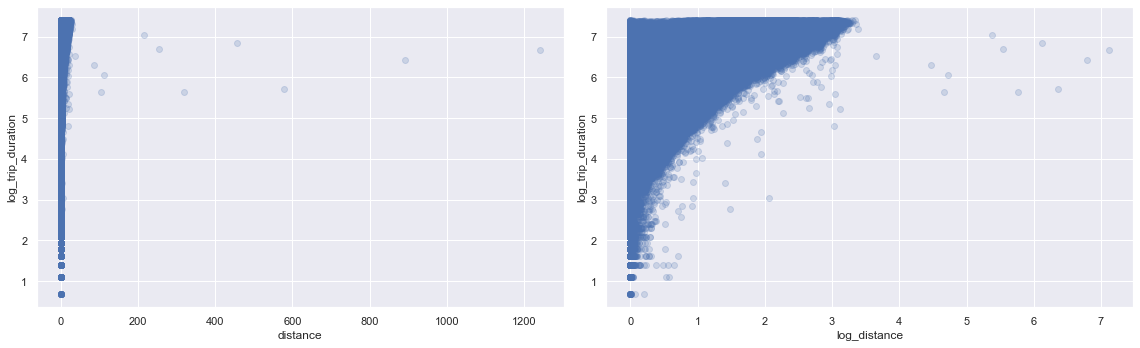

In [261]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, axs = plt.subplots(figsize=(16, 5), ncols=2)
for i, feature in enumerate(["distance", "log_distance"]):
    axs[i].scatter(X_train_haversine[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("log_trip_duration")
plt.tight_layout()

### Задание 7 (0.75 балла)
Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [262]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#а зачем мы удаляли trip duration, чтобы потом использовать :(
# ладненько, возьмем тогда обратную функцию логарифма, то есть exp(x) -1, с помощью np.expm1
X_train_haversine_dur = X_train_haversine.copy()
X_train_haversine_dur['trip_duration'] = np.expm1(y_train[['log_trip_duration']])
X_train_haversine_dur

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,log_distance,trip_duration
670840,2,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,N,5.353044,1.848934,1031.0
450733,2,2016-01-25 21:09:46,1,-73.982651,40.763981,-73.973862,40.748676,N,1.855837,1.049365,932.0
143827,1,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,N,1.289337,0.828262,631.0
425072,1,2016-04-01 22:49:48,1,-73.987083,40.752270,-73.988304,40.745663,N,0.741833,0.554938,477.0
494431,1,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,N,2.184356,1.158250,500.0
...,...,...,...,...,...,...,...,...,...,...,...
1157021,1,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,N,2.855692,1.349550,974.0
804336,1,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,N,4.182815,1.645348,978.0
1154171,1,2016-06-08 05:32:30,1,-73.966080,40.793144,-73.871445,40.774345,N,8.237394,2.223260,1038.0
617841,1,2016-03-30 09:13:29,1,-73.991096,40.731438,-73.955040,40.764961,N,4.808441,1.759312,1168.0


In [263]:
X_train_haversine_dur['mean_speed'] = X_train_haversine_dur['distance']/(X_train_haversine_dur['trip_duration']/60/60)
X_train_haversine_dur

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,log_distance,trip_duration,mean_speed
670840,2,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,N,5.353044,1.848934,1031.0,18.691521
450733,2,2016-01-25 21:09:46,1,-73.982651,40.763981,-73.973862,40.748676,N,1.855837,1.049365,932.0,7.168467
143827,1,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,N,1.289337,0.828262,631.0,7.355963
425072,1,2016-04-01 22:49:48,1,-73.987083,40.752270,-73.988304,40.745663,N,0.741833,0.554938,477.0,5.598737
494431,1,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,N,2.184356,1.158250,500.0,15.727364
...,...,...,...,...,...,...,...,...,...,...,...,...
1157021,1,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,N,2.855692,1.349550,974.0,10.554919
804336,1,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,N,4.182815,1.645348,978.0,15.396865
1154171,1,2016-06-08 05:32:30,1,-73.966080,40.793144,-73.871445,40.774345,N,8.237394,2.223260,1038.0,28.568998
617841,1,2016-03-30 09:13:29,1,-73.991096,40.731438,-73.955040,40.764961,N,4.808441,1.759312,1168.0,14.820537


<AxesSubplot:xlabel='mean_speed', ylabel='Count'>

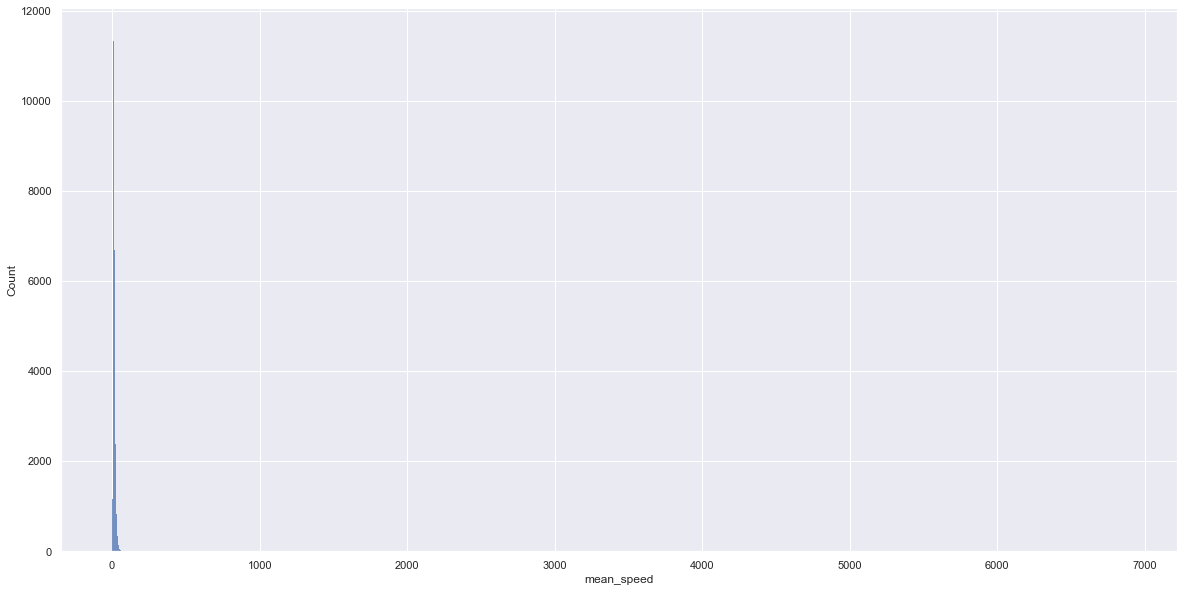

In [264]:
plt.figure(figsize =(20, 10))
sns.histplot(x = X_train_haversine_dur['mean_speed'])

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

<AxesSubplot:xlabel='mean_speed', ylabel='Count'>

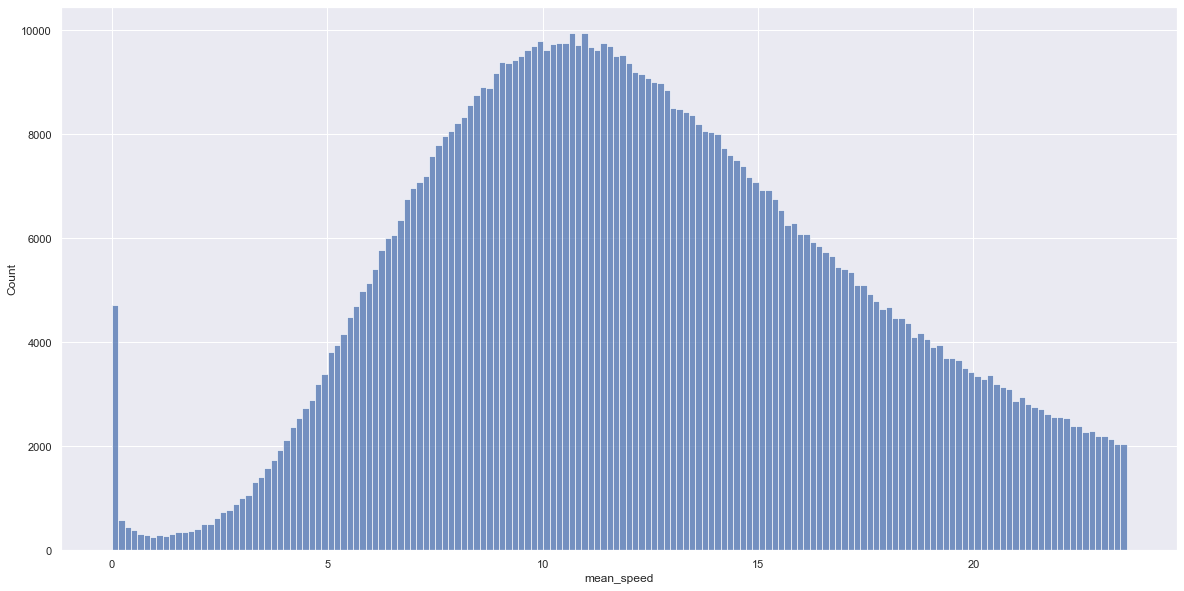

In [265]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# берем квантили на 90 процентах (все значения меньше топ 10%, то есть удаляем верхний выброс)
X_train_haversine_dur_MS_speed = X_train_haversine_dur[X_train_haversine_dur['mean_speed'] < np.quantile(X_train_haversine_dur['mean_speed'], 0.90)]
#X_train_haversine_dur_MS_speed
plt.figure(figsize =(20, 10))
sns.histplot(x = X_train_haversine_dur_MS_speed['mean_speed'])

# получаем magic)))

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [266]:
# добавим в данные нужные столбцы с днем недели и часом
X_train_haversine_dur_MS_speed['weekday'] = X_train_haversine_dur_MS_speed['pickup_datetime'].dt.day_name()
X_train_haversine_dur_MS_speed['hour_of_the_day'] = X_train_haversine_dur_MS_speed['pickup_datetime'].dt.hour
X_train_haversine_dur_MS_speed

<ipython-input-266-5eeb083f9626>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_haversine_dur_MS_speed['weekday'] = X_train_haversine_dur_MS_speed['pickup_datetime'].dt.day_name()
<ipython-input-266-5eeb083f9626>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_haversine_dur_MS_speed['hour_of_the_day'] = X_train_haversine_dur_MS_speed['pickup_datetime'].dt.hour


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,log_distance,trip_duration,mean_speed,weekday,hour_of_the_day
670840,2,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,N,5.353044,1.848934,1031.0,18.691521,Saturday,8
450733,2,2016-01-25 21:09:46,1,-73.982651,40.763981,-73.973862,40.748676,N,1.855837,1.049365,932.0,7.168467,Monday,21
143827,1,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,N,1.289337,0.828262,631.0,7.355963,Tuesday,10
425072,1,2016-04-01 22:49:48,1,-73.987083,40.752270,-73.988304,40.745663,N,0.741833,0.554938,477.0,5.598737,Friday,22
494431,1,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,N,2.184356,1.158250,500.0,15.727364,Friday,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960506,1,2016-03-09 17:27:55,1,-73.979126,40.744293,-73.966705,40.772400,N,3.295765,1.457630,1549.0,7.659622,Wednesday,17
1157021,1,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,N,2.855692,1.349550,974.0,10.554919,Wednesday,15
804336,1,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,N,4.182815,1.645348,978.0,15.396865,Tuesday,17
617841,1,2016-03-30 09:13:29,1,-73.991096,40.731438,-73.955040,40.764961,N,4.808441,1.759312,1168.0,14.820537,Wednesday,9


In [267]:
X_train_haversine_dur_MS_speed_graph = X_train_haversine_dur_MS_speed.groupby(
    ['weekday', 'hour_of_the_day'])['mean_speed'].median().to_frame().reset_index().rename(
    columns = {'mean_speed': 'median_mean_speed'})
X_train_haversine_dur_MS_speed_graph = X_train_haversine_dur_MS_speed_graph.pivot("weekday", "hour_of_the_day", "median_mean_speed")
X_train_haversine_dur_MS_speed_graph

hour_of_the_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,14.627909,15.402373,15.422866,16.025186,16.295041,17.053198,16.016370,13.037242,10.427712,9.545219,...,10.011983,9.868612,10.518692,10.684964,10.774936,11.048988,11.837431,12.118894,12.218954,12.587845
Monday,16.426715,16.184684,16.606582,16.476836,16.892510,17.096528,16.061011,13.483320,10.939573,10.155185,...,10.709895,10.841348,11.216799,11.450529,11.581760,12.799321,14.107553,14.543586,14.838625,15.619567
Saturday,13.159562,14.143531,14.410669,15.231093,15.659069,16.589661,16.923669,16.084591,15.223609,14.226197,...,11.629897,11.593299,11.746964,11.679924,11.310558,10.876534,11.505630,12.080692,12.025809,12.653677
Sunday,13.422272,14.080291,14.805984,15.460538,15.978715,16.625538,17.214193,16.753623,15.858241,15.440303,...,12.197035,12.270905,12.444178,12.446199,12.514314,13.101148,13.925771,14.521889,15.268674,15.775044
Thursday,15.533094,16.344033,16.714110,17.107805,16.659533,17.019224,15.658852,12.809444,10.110686,9.439039,...,9.148948,9.230899,9.898761,10.178883,10.178295,11.127840,12.291174,12.777570,13.176706,14.012304
Tuesday,16.120741,16.412492,16.688479,17.377541,17.131215,16.686255,15.670939,12.586220,10.049291,9.303560,...,9.373133,9.519829,10.189093,10.517658,10.633013,11.761309,13.260292,13.792714,14.318747,15.047983
Wednesday,15.596089,16.487708,16.610880,16.424471,17.210770,17.131999,15.953659,12.781507,10.150204,9.275021,...,9.128759,9.225659,10.041000,10.144698,10.334806,11.352396,12.831297,13.612064,13.987829,14.672945


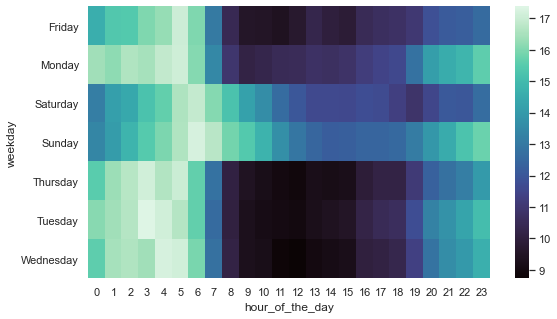

In [268]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# гафичек
plt.figure(figsize =(9, 5))
ax = sns.heatmap(X_train_haversine_dur_MS_speed_graph, cmap='mako')
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

In [269]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

X_train_haversine_dur = X_train_haversine_dur.drop(columns = 'mean_speed')
X_train_haversine_dur = X_train_haversine_dur.drop(columns = 'distance')
X_train_haversine_dur['weekday'] = X_train_haversine_dur['pickup_datetime'].dt.day_name()
X_train_haversine_dur['hour_of_the_day'] = X_train_haversine_dur['pickup_datetime'].dt.hour
X_train_haversine_dur

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_distance,trip_duration,weekday,hour_of_the_day
670840,2,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,N,1.848934,1031.0,Saturday,8
450733,2,2016-01-25 21:09:46,1,-73.982651,40.763981,-73.973862,40.748676,N,1.049365,932.0,Monday,21
143827,1,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,N,0.828262,631.0,Tuesday,10
425072,1,2016-04-01 22:49:48,1,-73.987083,40.752270,-73.988304,40.745663,N,0.554938,477.0,Friday,22
494431,1,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,N,1.158250,500.0,Friday,20
...,...,...,...,...,...,...,...,...,...,...,...,...
1157021,1,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,N,1.349550,974.0,Wednesday,15
804336,1,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,N,1.645348,978.0,Tuesday,17
1154171,1,2016-06-08 05:32:30,1,-73.966080,40.793144,-73.871445,40.774345,N,2.223260,1038.0,Wednesday,5
617841,1,2016-03-30 09:13:29,1,-73.991096,40.731438,-73.955040,40.764961,N,1.759312,1168.0,Wednesday,9


#### Вопрос
Почему значение скорости нельзя использовать во время обучения? <br>

<span style='color:#2E8B57'> 1) Потому что оно очень неточное, так как мы вычислили прямое расстояние, а не конкретный маршрут<br>
    2) Потому что скорость мы посчитали на основе нашей целевой переменной и нельзя предсказать переменную основываясь на ней же самой

#### Вопрос
Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

<span style='color:#2E8B57'>
    По тепловой карте видим, что медиана скорости выше в ночные часы, с 23 до 7 утра в будни и до 10 часов в выходные <br>
    То есть в дневные часы скорость ниже $\Rightarrow$ скорее всего на дороге пробки

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" <br>(естественно, они не должны зависеть от скорости!):

In [270]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# не от скорости так от времени (hour_of_the_day)
# тогда с 7 утра до 20 будут пробки, в остальное время дорога будет считаться свободной

#  пробки
X_train_haversine_dur['traffic_road'] = 0
X_train_haversine_dur['traffic_road']  = X_train_haversine_dur['traffic_road'].mask(
    (X_train_haversine_dur['hour_of_the_day'] <= 20) & (X_train_haversine_dur['hour_of_the_day'] >= 7), 1)

#  не пробки
X_train_haversine_dur['free_road'] = 0
X_train_haversine_dur['free_road']  = X_train_haversine_dur['free_road'].mask(
    (X_train_haversine_dur['hour_of_the_day'] > 20) | (X_train_haversine_dur['hour_of_the_day'] < 7), 1)

X_train_haversine_dur

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_distance,trip_duration,weekday,hour_of_the_day,traffic_road,free_road
670840,2,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,N,1.848934,1031.0,Saturday,8,1,0
450733,2,2016-01-25 21:09:46,1,-73.982651,40.763981,-73.973862,40.748676,N,1.049365,932.0,Monday,21,0,1
143827,1,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,N,0.828262,631.0,Tuesday,10,1,0
425072,1,2016-04-01 22:49:48,1,-73.987083,40.752270,-73.988304,40.745663,N,0.554938,477.0,Friday,22,0,1
494431,1,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,N,1.158250,500.0,Friday,20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157021,1,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,N,1.349550,974.0,Wednesday,15,1,0
804336,1,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,N,1.645348,978.0,Tuesday,17,1,0
1154171,1,2016-06-08 05:32:30,1,-73.966080,40.793144,-73.871445,40.774345,N,2.223260,1038.0,Wednesday,5,0,1
617841,1,2016-03-30 09:13:29,1,-73.991096,40.731438,-73.955040,40.764961,N,1.759312,1168.0,Wednesday,9,1,0


### Задание 8 (0.25 балла)
Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [271]:
# так как на карте их видно, но значения не посмотреть - посмотрим вручную по данным
# возьмем топ выбросов по долготе и широте точки отправления
geography_pickup_latitude = X_train_haversine_dur[X_train_haversine_dur['pickup_latitude'] 
                                                  > 
                                                  np.quantile(X_train_haversine_dur['pickup_latitude'], 0.99999)]
geography_pickup_latitude

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_distance,trip_duration,weekday,hour_of_the_day,traffic_road,free_road
774495,1,2016-04-07 23:19:52,1,-73.897598,41.317879,-73.897598,41.317879,N,0.000000,21.0,Thursday,23,0,1
591005,2,2016-02-12 12:51:26,1,-75.241493,41.430660,-75.570152,41.201477,N,3.649477,684.0,Friday,12,1,0
149274,1,2016-03-18 15:53:58,1,-74.195145,43.486885,-74.195145,43.486885,N,0.000000,674.0,Friday,15,1,0
1120884,1,2016-04-14 22:48:31,1,-72.591019,43.139652,-72.591019,43.139652,N,0.000000,799.0,Thursday,22,0,1
469593,1,2016-06-05 01:56:00,1,-70.511902,42.458942,-70.511902,42.458942,N,0.000000,224.0,Sunday,1,0,1
1223801,1,2016-05-05 18:21:37,1,-79.569733,41.586273,-80.355431,42.090183,N,4.464584,548.0,Thursday,18,1,0
954528,1,2016-02-26 19:50:03,1,-66.972160,44.371944,-69.048019,43.147583,N,5.376327,1131.0,Friday,19,1,0
166408,1,2016-05-07 18:58:53,1,-72.809669,51.881084,-73.987228,40.750599,N,7.124405,792.0,Saturday,18,1,0
435191,1,2016-03-25 12:02:22,1,-70.851616,43.017578,-70.851616,43.017578,N,0.000000,1486.0,Friday,12,1,0
748325,2,2016-01-26 02:37:42,1,-73.903389,41.687519,-73.903389,41.687519,N,0.000000,158.0,Tuesday,2,0,1


In [272]:
geography_pickup_longitude = X_train_haversine_dur[X_train_haversine_dur['pickup_longitude'] 
                                                   > 
                                                   np.quantile(X_train_haversine_dur['pickup_longitude'], 0.99999)]
geography_pickup_longitude


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_distance,trip_duration,weekday,hour_of_the_day,traffic_road,free_road
876657,2,2016-01-06 20:40:52,5,-71.799896,35.081532,-79.352837,40.436329,N,6.793706,611.0,Wednesday,20,1,0
698169,2,2016-02-14 09:01:52,2,-72.074333,35.310307,-72.022408,35.173546,N,2.828583,317.0,Sunday,9,1,0
703799,1,2016-02-22 20:25:33,2,-65.848389,34.359695,-65.848389,34.359695,N,0.000000,961.0,Monday,20,1,0
1120884,1,2016-04-14 22:48:31,1,-72.591019,43.139652,-72.591019,43.139652,N,0.000000,799.0,Thursday,22,0,1
469593,1,2016-06-05 01:56:00,1,-70.511902,42.458942,-70.511902,42.458942,N,0.000000,224.0,Sunday,1,0,1
954528,1,2016-02-26 19:50:03,1,-66.972160,44.371944,-69.048019,43.147583,N,5.376327,1131.0,Friday,19,1,0
166408,1,2016-05-07 18:58:53,1,-72.809669,51.881084,-73.987228,40.750599,N,7.124405,792.0,Saturday,18,1,0
1101482,1,2016-04-10 16:08:45,1,-72.421227,40.883472,-72.421227,40.883472,N,0.000000,53.0,Sunday,16,1,0
435191,1,2016-03-25 12:02:22,1,-70.851616,43.017578,-70.851616,43.017578,N,0.000000,1486.0,Friday,12,1,0
723768,1,2016-01-22 16:52:09,2,-61.335529,37.851051,-61.335529,37.851051,N,0.000000,369.0,Friday,16,1,0


In [273]:
# пересекаются 3 точки с индексами 1120884, 469593, 435191
a = geography_pickup_latitude.merge(geography_pickup_longitude, how = 'inner')
a

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_distance,trip_duration,weekday,hour_of_the_day,traffic_road,free_road
0,1,2016-04-14 22:48:31,1,-72.591019,43.139652,-72.591019,43.139652,N,0.000000,799.0,Thursday,22,0,1
1,1,2016-06-05 01:56:00,1,-70.511902,42.458942,-70.511902,42.458942,N,0.000000,224.0,Sunday,1,0,1
2,1,2016-02-26 19:50:03,1,-66.972160,44.371944,-69.048019,43.147583,N,5.376327,1131.0,Friday,19,1,0
3,1,2016-05-07 18:58:53,1,-72.809669,51.881084,-73.987228,40.750599,N,7.124405,792.0,Saturday,18,1,0
4,1,2016-03-25 12:02:22,1,-70.851616,43.017578,-70.851616,43.017578,N,0.000000,1486.0,Friday,12,1,0


In [274]:
# посмотрим на карте где они

show_circles_on_map(a, "pickup_latitude", "pickup_longitude", "blue")

In [275]:
# получилось криво, поэтому уберем самые странные выбросы и повторим

#  убираем выбросы
geography_pickup_latitude = X_train_haversine_dur[X_train_haversine_dur['pickup_latitude'] 
                                                  < 
                                                  np.quantile(X_train_haversine_dur['pickup_latitude'], 0.999)]
geography_pickup_longitude = X_train_haversine_dur[X_train_haversine_dur['pickup_longitude'] 
                                                   < 
                                                   np.quantile(X_train_haversine_dur['pickup_longitude'], 0.999)]

#  снова берем топ
geography_pickup_latitude = geography_pickup_latitude[geography_pickup_latitude['pickup_latitude'] 
                                                      > 
                                                      np.quantile(geography_pickup_latitude['pickup_latitude'], 0.9999999)]
geography_pickup_longitude = geography_pickup_longitude[geography_pickup_longitude['pickup_longitude'] 
                                                        > 
                                                        np.quantile(geography_pickup_longitude['pickup_longitude'], 0.9999999)]

#  пересекаем индексы
geography_pickup = geography_pickup_latitude.merge(geography_pickup_longitude, how = 'left')
geography_pickup # получили одну точку


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_distance,trip_duration,weekday,hour_of_the_day,traffic_road,free_road
0,1,2016-05-18 22:44:32,1,-73.936966,40.842335,-73.982834,40.722805,N,2.69738,1539.0,Wednesday,22,0,1


In [276]:
# смотрим на карте
show_circles_on_map(geography_pickup, "pickup_latitude", "pickup_longitude", "blue")

Мы возьмем две точки: одну из тех, которые в которой началась поездка, другую ту, в которой закончилась

In [277]:
# то же самое для dropoff

#  убираем выбросы
geography_dropoff_latitude = X_train_haversine_dur[X_train_haversine_dur['dropoff_latitude'] 
                                                   < 
                                                   np.quantile(X_train_haversine_dur['dropoff_latitude'], 0.999)]
geography_dropoff_longitude = X_train_haversine_dur[X_train_haversine_dur['dropoff_longitude'] 
                                                    < 
                                                    np.quantile(X_train_haversine_dur['dropoff_longitude'], 0.999)]

#  снова берем топ
geography_dropoff_latitude = geography_dropoff_latitude[geography_dropoff_latitude['dropoff_latitude'] 
                                                        > 
                                                        np.quantile(geography_dropoff_latitude['dropoff_latitude'], 0.9999999)]
geography_dropoff_longitude = geography_dropoff_longitude[geography_dropoff_longitude['dropoff_longitude'] 
                                                          > 
                                                          np.quantile(geography_dropoff_longitude['dropoff_longitude'], 0.9999999)]

#  пересекаем индексы
geography_dropoff = geography_dropoff_latitude.merge(geography_dropoff_longitude, how = 'left')
geography_dropoff # получили одну точку


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_distance,trip_duration,weekday,hour_of_the_day,traffic_road,free_road
0,2,2016-01-26 22:01:00,1,-73.952888,40.783455,-73.909615,40.875744,N,2.475598,1505.0,Tuesday,22,0,1


In [278]:
# смотрим на карте
show_circles_on_map(geography_dropoff, "dropoff_latitude", "dropoff_longitude", "blue")

In [279]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

#  дальняя точка посадки (что-то по координатам не вышло - посмотрела - тут одно дата и время соответствующее этим координатам, поэтому по ним сделаю маску)
X_train_haversine_dur['far_pickup'] = 0
X_train_haversine_dur['far_pickup'] = X_train_haversine_dur['far_pickup'].mask(
    (X_train_haversine_dur['pickup_datetime'] == '2016-04-16 04:11:59'), 1)

#  дальняя точка высадки
X_train_haversine_dur['far_dropoff'] = 0
X_train_haversine_dur['far_dropoff'] = X_train_haversine_dur['far_dropoff'].mask(
    (X_train_haversine_dur['pickup_datetime'] == '2016-02-15 10:15:33'), 1)

X_train_haversine_dur[['far_pickup', 'far_dropoff']].value_counts().to_frame()


0
far_pickup far_dropoff        
0          0            918867
           1                 1
1          0                 1

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

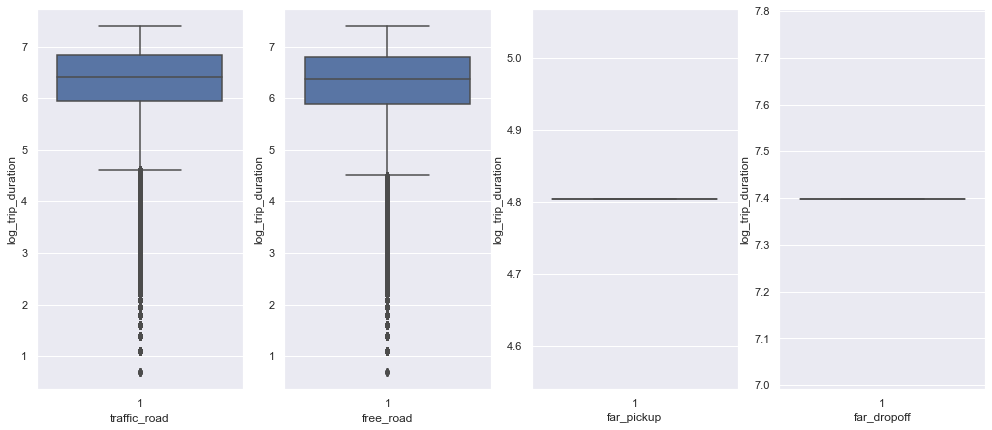

In [280]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

f, axes = plt.subplots(1, 4, figsize=(17, 7))
X_train_haversine_dur['log_trip_duration'] = np.log1p(X_train_haversine_dur['trip_duration'] )
plot1 = X_train_haversine_dur[X_train_haversine_dur['traffic_road'] == 1]#[['log_trip_duration']]
plot2 = X_train_haversine_dur[X_train_haversine_dur['free_road'] == 1]#[['log_trip_duration']]
plot3 = X_train_haversine_dur[X_train_haversine_dur['far_pickup'] == 1]#[['log_trip_duration']]
plot4 = X_train_haversine_dur[X_train_haversine_dur['far_dropoff'] == 1]#[['log_trip_duration']]
sns.boxplot(x = plot1['traffic_road'], y = plot1['log_trip_duration'], ax = axes[0])
sns.boxplot(x = plot2['free_road'], y = plot2['log_trip_duration'], ax = axes[1])
sns.boxplot(x = plot3['far_pickup'], y = plot3['log_trip_duration'], ax = axes[2])
sns.boxplot(x = plot4['far_dropoff'], y = plot4['log_trip_duration'], ax = axes[3])

#sns.boxplot(plot2['log_trip_duration'], y = X_train_haversine_dur[X_train_haversine_dur['free_road'] == 1], ax = axes[1])
#sns.boxplot(plot3['log_trip_duration'], ax = axes[2])
#sns.boxplot(plot4['log_trip_duration'], ax = axes[3])
plt.show()

#### Вопрос 
судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<span style='color:#2E8B57'> Бинарный признак по двум точкам плох и ужасен - то есть неинформативен. Признак с пробками может быть полезен, но есть выбросы

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

### Задание 9 (1 балл)
Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [281]:
'''from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ...):
        # your code here
        pass
    
    def show_map(self):
        # you may want to visualize cells
        pass
    
    def fit(self, X=None, y=None):
        # your code here
        return self

    def transform(self, X, y=None):
        # your code here
        return X'''

'from sklearn.base import BaseEstimator, TransformerMixin\n\n\n# TransformerMixin implements fit_transform for you,\n# applying your fit and transform consistently\n    \nclass MapGridTransformer(BaseEstimator, TransformerMixin):\n    def __init__(self, ...):\n        # your code here\n        pass\n    \n    def show_map(self):\n        # you may want to visualize cells\n        pass\n    \n    def fit(self, X=None, y=None):\n        # your code here\n        return self\n\n    def transform(self, X, y=None):\n        # your code here\n        return X'

In [282]:
# функция
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles, Polygon, CircleMarker, LayerGroup

from scipy.spatial.distance import cdist


COL_NAMES = dict(
    pick_lat="pickup_latitude",
    pick_lon="pickup_longitude",
    drop_lat="dropoff_latitude",
    drop_lon="dropoff_longitude"
)

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, loc, col, row, col_names=COL_NAMES):
        self.location_mh = loc
        self.col = col
        self.row = row
        self.col_names = col_names
        self.pick_lat = col_names["pick_lat"]
        self.pick_lon = col_names["pick_lon"]
        self.drop_lat = col_names["drop_lat"]
        self.drop_lon = col_names["drop_lon"]
        self.lat_min, self.lat_max = loc[:, 0].min(), loc[:, 0].max()
        self.lon_min, self.lon_max = loc[:, 1].min(), loc[:, 1].max()

    def create_box_(self, loc):
        polygon_loc = [
                    [(loc[0] - self.walls[0] / 2), loc[1] - self.walls[1] / 2],
                    [loc[0] + self.walls[0] / 2, loc[1] - self.walls[1] / 2],
                    [loc[0] + self.walls[0] / 2, loc[1] + self.walls[1] / 2],
                    [loc[0] - self.walls[0] / 2, loc[1] + self.walls[1] / 2]
                  ]
        return polygon_loc

    def show_map(self):
        self.walls, self.circles_loc = self._fit()
        _map = Map(center=((self.location_mh[:, 0]).mean(), (self.location_mh[:, 1]).mean()),
                   zoom=11, basemap=basemaps.Esri.NatGeoWorldMap)

        circles = [(CircleMarker(location=(lat, long), fill_color='white',
                                 fill_opacity=1, radius=5, stroke=False)) for lat, long in self.circles_loc]
        polygons = [(Polygon(locations=self.create_box_(loc), fill_opacity=0.05)) for loc in self.circles_loc]

        circles_layer = LayerGroup(layers=circles)
        polygon_layer = LayerGroup(layers=polygons)

        _map.add_layer(circles_layer)
        _map.add_layer(polygon_layer)

        return _map

    def _fit(self):
        self.walls = [(self.location_mh[:, 0].max() - self.location_mh[:, 0].min()) / self.col, (self.location_mh[:, 1].max() - self.location_mh[:, 1].min()) / self.row]
        self.circles_loc = np.array([(((self.location_mh[:, 0].min() + i * (self.walls[0] / 2))), (self.location_mh[:, 1].min() + j * (self.walls[1] / 2)) ) 
                                     for i in range(1, (self.col) * 2, 2) for j in range(1, (self.row) * 2, 2)])

        return self.walls, self.circles_loc

    def get_sector_idx(self, X):
        _, self.circles_loc = self._fit()
        pickup_idx = cdist(X.loc[:, [self.pick_lat, self.pick_lon]],
                           a.circles_loc).argmin(axis=1)
        dropoff_idx = cdist(X.loc[:, [self.drop_lat, self.drop_lon]],
                            a.circles_loc).argmin(axis=1)
        qry = f"@self.lat_min <= {self.pick_lat} <= @self.lat_max \
               and @self.lon_min <= {self.pick_lon} <= @self.lon_max"
        pickup_valid = X.eval(qry).to_numpy()
        pickup_idx[~pickup_valid] = -1
        qry = f"@self.lat_min <= {self.drop_lat} <= @self.lat_max \
               and @self.lon_min <= {self.drop_lon} <= @self.lon_max"
        dropoff_valid = X.eval(qry).to_numpy()
        dropoff_idx[~dropoff_valid] = -1
        
        return pickup_idx, dropoff_idx

    def transform(self, X):
        return (X,) + self.get_sector_idx(X)

In [283]:
# задаем крайние точки прямоугольника с ячейками
mh = np.array([
              [40.703314, -74.018608],
              [40.703314, -73.934241],
              [40.791438, -73.934241],
              [40.791438, -74.018608]
               ])

# задаем кол-во ячеек
a = MapGridTransformer(mh, 4, 3)

# смотрим на красоту
a.show_map()

Map(center=[40.747376, -73.97642450000001], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_i…

In [284]:
# столбцы Nstart и Nend
#  выбираем нужные столбцы
test = X_train_haversine_dur[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].copy()

#  применяем функцию
test_cut = a.transform(test)

#  выбираем из результата нужное и преобразуем
Nstart = test_cut[1]
Nend = test_cut[2]
N_start = pd.DataFrame(list(Nstart), columns = ['Nstart'])
N_end = pd.DataFrame(list(Nend), columns = ['Nend'])
N_start_end = N_start.merge(N_end, left_index=True, right_index=True)
#N_start_end

#  Мерджим с исходным датасетом
#   Небольшое преобразование, чтобы соединить датафреймы по индексу
X_train_haversine_dur = X_train_haversine_dur.reset_index(drop = False)
X_train_haversine_dur = X_train_haversine_dur.merge(N_start_end, left_index=True, right_index=True)
X_train_haversine_dur = X_train_haversine_dur.set_index(['index'])
X_train_haversine_dur

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_distance,trip_duration,weekday,hour_of_the_day,traffic_road,free_road,far_pickup,far_dropoff,log_trip_duration,Nstart,Nend
index,,,,,,,,,,,,,,,,,,,
670840,2,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,N,1.848934,1031.0,Saturday,8,1,0,0,0,6.939254,11,3
450733,2,2016-01-25 21:09:46,1,-73.982651,40.763981,-73.973862,40.748676,N,1.049365,932.0,Monday,21,0,1,0,0,6.838405,7,7
143827,1,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,N,0.828262,631.0,Tuesday,10,1,0,0,0,6.448889,11,11
425072,1,2016-04-01 22:49:48,1,-73.987083,40.752270,-73.988304,40.745663,N,0.554938,477.0,Friday,22,0,1,0,0,6.169611,7,4
494431,1,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,N,1.158250,500.0,Friday,20,1,0,0,0,6.216606,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157021,1,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,N,1.349550,974.0,Wednesday,15,1,0,0,0,6.882437,7,10
804336,1,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,N,1.645348,978.0,Tuesday,17,1,0,0,0,6.886532,7,3
1154171,1,2016-06-08 05:32:30,1,-73.966080,40.793144,-73.871445,40.774345,N,2.223260,1038.0,Wednesday,5,0,1,0,0,6.946014,-1,-1


### Задание 10 (0.25 балла)
Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [285]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import Pipeline

X_train2 = X_train_haversine_dur.copy()

# выделяем численные столбцы
numeric_data = X_train2.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

# и категориальные
categorical = list(X_train2.dtypes[X_train2.dtypes == "object"].index)
X_train2[categorical] = X_train2[categorical].fillna("NotGiven")

# OneHotEncoder
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train2, y_train)

# StandartScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2[numeric_features])

# Ridge regression
model = Ridge()
model.fit(X_train2[numeric_features], y_train)
y_train_pred = model.predict(X_train2[numeric_features])

print("Train RMSLE = ", np.sqrt(mean_squared_log_error(y_train, y_train_pred)))

Train RMSLE =  9.5121831159736e-07


## Часть 3. Изучаем оставшиеся признаки (1 балл)

### Задание 11 (0.75 баллов)
У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

#### Вопрос 
Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [286]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from IPython.display import display

vendor_id_count = X_train_haversine_dur[['vendor_id']].value_counts(sort=True).to_frame().reset_index().rename(columns = {0: 'count'})
passenger_count_count = X_train_haversine_dur[['passenger_count']].value_counts(sort=True).to_frame().reset_index().rename(columns = {0: 'count'})
store_and_fwd_flag_count = X_train_haversine_dur[['store_and_fwd_flag']].value_counts(sort=True).to_frame().reset_index().rename(columns = {0: 'count'})

display(vendor_id_count, passenger_count_count, store_and_fwd_flag_count)

,vendor_id,count
0,2,489556
1,1,429313


,passenger_count,count
0,1,654124
1,2,130540
2,5,49031
3,3,37217
4,6,30399
5,4,17517
6,0,37
7,7,3
8,8,1


,store_and_fwd_flag,count
0,N,914343
1,Y,4526


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

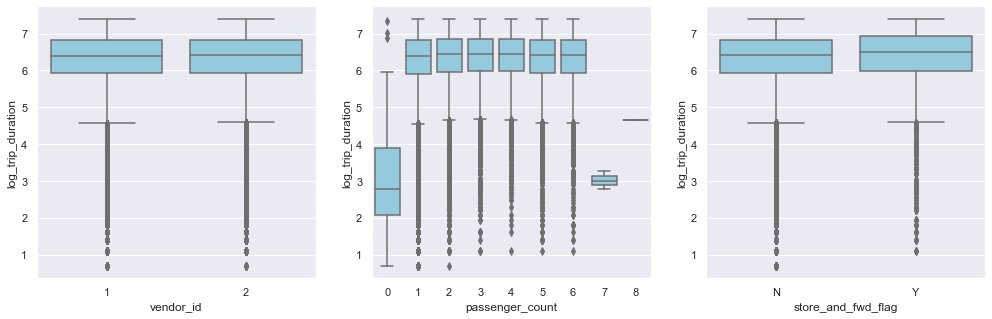

In [287]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

f, axes = plt.subplots(1, 3, figsize=(17, 5))
sns.boxplot(x = X_train_haversine_dur['vendor_id'], y = X_train_haversine_dur['log_trip_duration'], color='skyblue', ax=axes[0])
sns.boxplot(x = X_train_haversine_dur['passenger_count'], y = X_train_haversine_dur['log_trip_duration'], color='skyblue', ax=axes[1])
sns.boxplot(x = X_train_haversine_dur['store_and_fwd_flag'], y = X_train_haversine_dur['log_trip_duration'], color='skyblue', ax=axes[2])
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [288]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_haversine_dur['vendor_id_1'] = 0
X_train_haversine_dur['vendor_id_1']  = X_train_haversine_dur['vendor_id_1'].mask(X_train_haversine_dur['vendor_id'] == 2, 1)
a = X_train_haversine_dur['vendor_id_1'].value_counts().to_frame()

X_train_haversine_dur['store_and_fwd_flag_1'] = 0
X_train_haversine_dur['store_and_fwd_flag_1']  = X_train_haversine_dur['store_and_fwd_flag_1'].mask(X_train_haversine_dur['store_and_fwd_flag'] == 'Y', 1)
b = X_train_haversine_dur['store_and_fwd_flag_1'].value_counts().to_frame()

display(a, b)

,vendor_id_1
1,489556
0,429313


,store_and_fwd_flag_1
0,914343
1,4526


#### Вопрос 
Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными? <br>
<span style='color:#2E8B57'>
    Они будут слабее, чем остальные, так как присутствуют выбросы (длинные хвосты), данные не идеальны по этим переменным. Но тем не менее эти признаки полезнее выделения одной самой дальней точки

### Задание 12 (0.25 баллов) 
Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [289]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import Pipeline

X_train2 = X_train_haversine_dur.copy()

# выделяем численные столбцы
numeric_data = X_train2.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

# и категориальные
categorical = list(X_train2.dtypes[X_train2.dtypes == "object"].index)
X_train2[categorical] = X_train2[categorical].fillna("NotGiven")

# OneHotEncoder
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train2, y_train)

# StandartScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2[numeric_features])

# Ridge regression
model = Ridge()
model.fit(X_train2[numeric_features], y_train)
y_train_pred = model.predict(X_train2[numeric_features])

print("Train RMSLE = ", np.sqrt(mean_squared_log_error(y_train, y_train_pred)))

Train RMSLE =  9.511943023741222e-07


In [290]:
d = pd.DataFrame(y_train_pred)
y_train

,log_trip_duration
670840,6.939254
450733,6.838405
143827,6.448889
425072,6.169611
494431,6.216606
...,...
1157021,6.882437
804336,6.886532
1154171,6.946014
617841,7.063904


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [291]:
# ощутимо не повлияли на RMSLE - удаляем
X_train_haversine_dur = X_train_haversine_dur.drop(columns = ['vendor_id_1', 'store_and_fwd_flag_1'])
X_train_haversine_dur

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_distance,trip_duration,weekday,hour_of_the_day,traffic_road,free_road,far_pickup,far_dropoff,log_trip_duration,Nstart,Nend
index,,,,,,,,,,,,,,,,,,,
670840,2,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,N,1.848934,1031.0,Saturday,8,1,0,0,0,6.939254,11,3
450733,2,2016-01-25 21:09:46,1,-73.982651,40.763981,-73.973862,40.748676,N,1.049365,932.0,Monday,21,0,1,0,0,6.838405,7,7
143827,1,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,N,0.828262,631.0,Tuesday,10,1,0,0,0,6.448889,11,11
425072,1,2016-04-01 22:49:48,1,-73.987083,40.752270,-73.988304,40.745663,N,0.554938,477.0,Friday,22,0,1,0,0,6.169611,7,4
494431,1,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,N,1.158250,500.0,Friday,20,1,0,0,0,6.216606,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157021,1,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,N,1.349550,974.0,Wednesday,15,1,0,0,0,6.882437,7,10
804336,1,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,N,1.645348,978.0,Tuesday,17,1,0,0,0,6.886532,7,3
1154171,1,2016-06-08 05:32:30,1,-73.966080,40.793144,-73.871445,40.774345,N,2.223260,1038.0,Wednesday,5,0,1,0,0,6.946014,-1,-1


## Часть 4. Улучшаем модель (3 балла)

### Задание 13 (1 балл)
В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

*Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.*

<AxesSubplot:xlabel='log_trip_duration', ylabel='Count'>

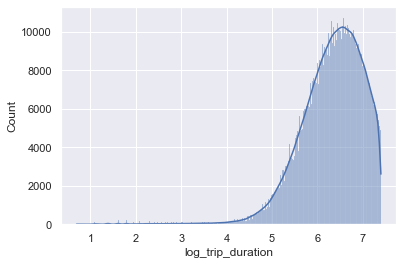

In [293]:
sns.histplot(data = X_train_haversine_dur,  x = 'log_trip_duration', kde=True)

<AxesSubplot:xlabel='log_trip_duration', ylabel='Count'>

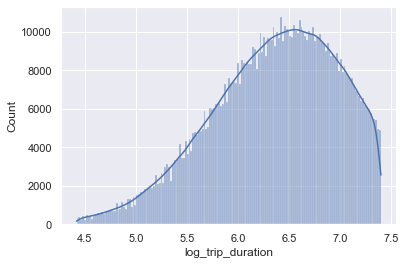

In [294]:
# убрали выбросы в переменной логарифма продолжительности поездки
mask1 = X_train_haversine_dur[X_train_haversine_dur['log_trip_duration'] > np.quantile(X_train_haversine_dur['log_trip_duration'], 0.01)]
#mask1
sns.histplot(data = mask1,  x = 'log_trip_duration', kde=True)

<AxesSubplot:xlabel='log_distance', ylabel='Count'>

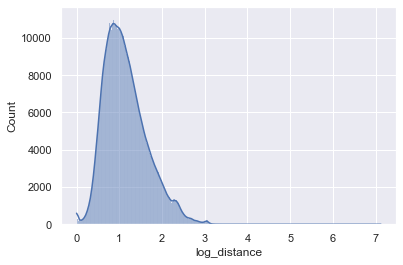

In [295]:
sns.histplot(data = mask1,  x = 'log_distance', kde=True)

<AxesSubplot:xlabel='log_distance', ylabel='Count'>

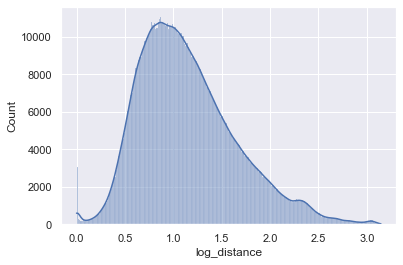

In [296]:
# убрали выбросы в переменной логарифма расстояния
mask1_2 = mask1[mask1['log_distance'] < np.quantile(mask1['log_distance'], 0.9999)]
sns.histplot(data = mask1_2,  x = 'log_distance', kde=True)

In [298]:
mask1_2

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_distance,trip_duration,weekday,hour_of_the_day,traffic_road,free_road,far_pickup,far_dropoff,log_trip_duration,Nstart,Nend
index,,,,,,,,,,,,,,,,,,,
670840,2,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,N,1.848934,1031.0,Saturday,8,1,0,0,0,6.939254,11,3
450733,2,2016-01-25 21:09:46,1,-73.982651,40.763981,-73.973862,40.748676,N,1.049365,932.0,Monday,21,0,1,0,0,6.838405,7,7
143827,1,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,N,0.828262,631.0,Tuesday,10,1,0,0,0,6.448889,11,11
425072,1,2016-04-01 22:49:48,1,-73.987083,40.752270,-73.988304,40.745663,N,0.554938,477.0,Friday,22,0,1,0,0,6.169611,7,4
494431,1,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,N,1.158250,500.0,Friday,20,1,0,0,0,6.216606,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157021,1,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,N,1.349550,974.0,Wednesday,15,1,0,0,0,6.882437,7,10
804336,1,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,N,1.645348,978.0,Tuesday,17,1,0,0,0,6.886532,7,3
1154171,1,2016-06-08 05:32:30,1,-73.966080,40.793144,-73.871445,40.774345,N,2.223260,1038.0,Wednesday,5,0,1,0,0,6.946014,-1,-1


/Users/isupport/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_trip_duration', ylabel='Density'>

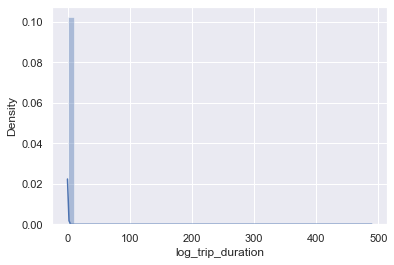

In [304]:
# подчищаем данные
y_train = mask1_2['log_trip_duration'].copy()
X_train = mask1_2.drop(columns = ['log_trip_duration', 'vendor_id', 'store_and_fwd_flag', 'trip_duration', 'log_trip_duration'])

# выделяем численные столбцы
numeric_data = X_train.select_dtypes([np.number])
numeric_features = numeric_data.columns

# error
model = Ridge()
model.fit(X_train[numeric_features], y_train)
model.predict(X_train[numeric_features])

error = (y_train - model.predict(X_train[numeric_features])) ** 2
sns.distplot(error)

In [308]:
# добавим столбец в датасет, чтобы почистить и удалить его
mask1_2_3 = X_train.merge(error, how = 'left', left_index = True, right_index = True) # log_trip_duration_x
mask1_2_3 = mask1_2_3.merge(y_train, how = 'left', left_index = True, right_index = True) # log_trip_duration_y
mask1_2_3

,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_distance,weekday,hour_of_the_day,traffic_road,free_road,far_pickup,far_dropoff,Nstart,Nend,log_trip_duration_x,log_trip_duration_y
index,,,,,,,,,,,,,,,,,
670840,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,1.848934,Saturday,8,1,0,0,0,11,3,0.012727,6.939254
450733,2016-01-25 21:09:46,1,-73.982651,40.763981,-73.973862,40.748676,1.049365,Monday,21,0,1,0,0,7,7,0.452500,6.838405
143827,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,0.828262,Tuesday,10,1,0,0,0,11,11,0.129457,6.448889
425072,2016-04-01 22:49:48,1,-73.987083,40.752270,-73.988304,40.745663,0.554938,Friday,22,0,1,0,0,7,4,0.223835,6.169611
494431,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,1.158250,Friday,20,1,0,0,0,-1,-1,0.001053,6.216606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157021,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,1.349550,Wednesday,15,1,0,0,0,7,10,0.072481,6.882437
804336,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,1.645348,Tuesday,17,1,0,0,0,7,3,0.001730,6.886532
1154171,2016-06-08 05:32:30,1,-73.966080,40.793144,-73.871445,40.774345,2.223260,Wednesday,5,0,1,0,0,-1,-1,0.014981,6.946014


<AxesSubplot:xlabel='log_trip_duration_x', ylabel='Count'>

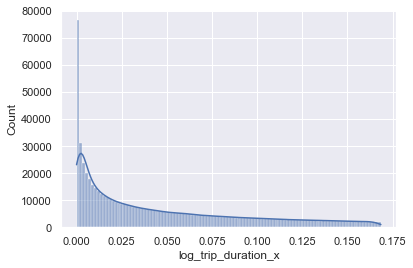

In [311]:
# убрали выбросы в остатках
mask1_2_3_4 = mask1_2_3[mask1_2_3['log_trip_duration_x'] < np.quantile(mask1_2_3['log_trip_duration_x'], 0.7)]
sns.histplot(data = mask1_2_3_4,  x = 'log_trip_duration_x', kde=True)

In [325]:
# подчищаем данные (перенарезаем)
y_train = mask1_2_3_4['log_trip_duration_y'].copy()
X_train = mask1_2_3_4.drop(columns = ['log_trip_duration_x', 'log_trip_duration_y', 'far_pickup', 'far_dropoff']) 
# можно было бы far_pickup и far_dropoff удалить, тк они кривые, но вроде команды нам такой не было

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

<span style='color:#2E8B57'> У нас из категорийных признаков только дни недели - ни один из дней недели не является действительно редким - не объединяю

In [318]:
categorical = list(X_train.dtypes[X_train_haversine_dur.dtypes == "object"].index)
X_train[categorical].value_counts().to_frame()

,0
weekday,
Saturday,99882
Friday,95911
Thursday,91534
Sunday,89008
Wednesday,88708
Tuesday,87621
Monday,84048


In [ ]:
# наработки в данных по X_test

#   log_distance

import math

def haversine(lat1, lon1, lat2, lon2):
    # distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

X_test['distance']=X_test.apply(lambda row:haversine(
    row['pickup_latitude'],
    row['pickup_longitude'],
    row['dropoff_latitude'],
    row['dropoff_longitude']),axis=1)
X_test['distance']=X_test['distance'].astype(float)

X_test['log_distance'] = np.log1p(X_test[['distance']])
X_test = X_test.drop(columns = 'distance')

#   weekday, hour_of_the_day
X_test['weekday'] = X_test['pickup_datetime'].dt.day_name()
X_test['hour_of_the_day'] = X_test['pickup_datetime'].dt.hour

#   traffic_road, free_road
#      пробки
X_test['traffic_road'] = 0
X_test['traffic_road']  = X_test['traffic_road'].mask((X_test['hour_of_the_day'] <= 20) & (X_test['hour_of_the_day'] >= 7), 1)

#      не пробки
X_test['free_road'] = 0
X_test['free_road']  = X_test['free_road'].mask((X_test['hour_of_the_day'] > 20) | (X_test['hour_of_the_day'] < 7), 1)

In [323]:
# столбцы Nstart и Nend
a = MapGridTransformer(mh, 4, 3)
#  выбираем нужные столбцы
test = X_test[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].copy()

#  применяем функцию
test_cut = a.transform(test)

#  выбираем из результата нужное и преобразуем
Nstart = test_cut[1]
Nend = test_cut[2]
N_start = pd.DataFrame(list(Nstart), columns = ['Nstart'])
N_end = pd.DataFrame(list(Nend), columns = ['Nend'])
N_start_end = N_start.merge(N_end, left_index=True, right_index=True)
#N_start_end

#  Мерджим с исходным датасетом
#   Небольшое преобразование, чтобы соединить датафреймы по индексу
X_test = X_test.reset_index(drop = False)
X_test = X_test.merge(N_start_end, left_index=True, right_index=True)
X_test = X_test.set_index(['index'])

X_test

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_distance,weekday,hour_of_the_day,traffic_road,free_road,Nstart,Nend
index,,,,,,,,,,,,,,,
549319,2,2016-04-02 11:40:36,1,-73.995552,40.744427,-73.964272,40.764614,N,1.495455,Saturday,11,1,0,3,7
997504,1,2016-01-20 09:12:49,1,-73.990013,40.732834,-73.991829,40.754646,N,1.232634,Wednesday,9,1,0,4,6
345397,1,2016-02-29 15:20:12,1,-73.956841,40.783131,-73.959816,40.773880,N,0.722073,Monday,15,1,0,11,11
911930,1,2016-02-27 12:04:30,3,-74.015968,40.714970,-73.998383,40.722912,N,1.002557,Saturday,12,1,0,0,0
363823,1,2016-04-07 19:31:28,1,-73.991310,40.750053,-73.971130,40.755058,N,1.025542,Thursday,19,1,0,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060850,1,2016-03-15 18:03:11,1,-73.968864,40.764126,-73.979507,40.754673,N,0.867706,Tuesday,18,1,0,7,7
189688,2,2016-01-02 12:54:51,1,-73.974228,40.756882,-73.984131,40.759762,N,0.638407,Saturday,12,1,0,7,7
897401,1,2016-06-07 15:56:46,2,-73.974609,40.760193,-73.978310,40.761879,N,0.310199,Tuesday,15,1,0,7,7


In [327]:
X_test = X_test.drop(columns = ['vendor_id', 'store_and_fwd_flag'])
X_test

,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_distance,weekday,hour_of_the_day,traffic_road,free_road,Nstart,Nend
index,,,,,,,,,,,,,
549319,2016-04-02 11:40:36,1,-73.995552,40.744427,-73.964272,40.764614,1.495455,Saturday,11,1,0,3,7
997504,2016-01-20 09:12:49,1,-73.990013,40.732834,-73.991829,40.754646,1.232634,Wednesday,9,1,0,4,6
345397,2016-02-29 15:20:12,1,-73.956841,40.783131,-73.959816,40.773880,0.722073,Monday,15,1,0,11,11
911930,2016-02-27 12:04:30,3,-74.015968,40.714970,-73.998383,40.722912,1.002557,Saturday,12,1,0,0,0
363823,2016-04-07 19:31:28,1,-73.991310,40.750053,-73.971130,40.755058,1.025542,Thursday,19,1,0,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060850,2016-03-15 18:03:11,1,-73.968864,40.764126,-73.979507,40.754673,0.867706,Tuesday,18,1,0,7,7
189688,2016-01-02 12:54:51,1,-73.974228,40.756882,-73.984131,40.759762,0.638407,Saturday,12,1,0,7,7
897401,2016-06-07 15:56:46,2,-73.974609,40.760193,-73.978310,40.761879,0.310199,Tuesday,15,1,0,7,7


In [326]:
X_train

,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_distance,weekday,hour_of_the_day,traffic_road,free_road,Nstart,Nend
index,,,,,,,,,,,,,
670840,2016-01-30 08:28:07,1,-73.951355,40.773594,-73.996696,40.739861,1.848934,Saturday,8,1,0,11,3
143827,2016-04-12 10:54:54,2,-73.952911,40.772285,-73.952599,40.783878,0.828262,Tuesday,10,1,0,11,11
494431,2016-05-27 20:31:26,2,-73.938942,40.852119,-73.924034,40.868206,1.158250,Friday,20,1,0,-1,-1
932183,2016-01-31 18:06:25,1,-73.987526,40.750813,-73.982063,40.743488,0.660332,Sunday,18,1,0,7,4
118788,2016-01-29 19:30:30,1,-73.994499,40.731960,-73.983437,40.693729,1.677496,Friday,19,1,0,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157021,2016-01-13 15:10:22,1,-73.985001,40.753887,-73.963913,40.773998,1.349550,Wednesday,15,1,0,7,10
804336,2016-04-26 17:18:35,2,-73.979591,40.766060,-74.006340,40.734367,1.645348,Tuesday,17,1,0,7,3
1154171,2016-06-08 05:32:30,1,-73.966080,40.793144,-73.871445,40.774345,2.223260,Wednesday,5,0,1,-1,-1


In [333]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# МОДЕЛЬКА
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.pipeline import Pipeline

X_train2 = X_train.copy()

# выделяем численные столбцы
numeric_data = X_train2.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

# и категориальные
categorical = list(X_train2.dtypes[X_train2.dtypes == "object"].index)
X_train2[categorical] = X_train2[categorical].fillna("NotGiven")

# OneHotEncoder
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train2, y_train)
y_pred = model.predict(X_test)

# StandartScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2[numeric_features])

# Ridge regression
model = Ridge()
model.fit(X_train2[numeric_features], y_train)
y_train_pred = model.predict(X_train2[numeric_features])

print("Train RMSLE = ", np.sqrt(mean_squared_log_error(y_train, y_train_pred)))
print("Test MSE = ",  mean_squared_error(y_test, y_pred)) # тут были отрицательные чиселки, поэтому RMSLE не работала
print("Train MSE = ", mean_squared_error(y_train, y_train_pred)) # ну и сравним тогда уж с такой же метрикой по обучающей выборке

Train RMSLE =  0.02942568610473894
Test MSE =  0.22723921144486525
Train MSE =  0.04652903310006338


In [339]:
# а попробуем координаты из X_test и X_train удалить
X_test1 = X_test.drop(columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
X_train1 = X_train.drop(columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

In [345]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# МОДЕЛЬКА
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.pipeline import Pipeline

X_train2 = X_train1.copy()
X_test = X_test1.copy()

# выделяем численные столбцы
numeric_data = X_train2.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

# и категориальные
categorical = list(X_train2.dtypes[X_train2.dtypes == "object"].index)
X_train2[categorical] = X_train2[categorical].fillna("NotGiven")

# OneHotEncoder
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train2, y_train)
y_pred = model.predict(X_test)

# StandartScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2[numeric_features])

# Ridge regression
model = Ridge()
model.fit(X_train2[numeric_features], y_train)
y_train_pred = model.predict(X_train2[numeric_features])

print("Train RMSLE = ", np.sqrt(mean_squared_log_error(y_train, y_train_pred)))
print("Test RMSLE = ", np.sqrt(mean_squared_log_error(y_test, y_pred)))

Train RMSLE =  0.030723719282137147
Test RMSLE =  0.07418469307400612


<span style='color:#2E8B57'> 
    Получилось удалив координаты (по сути дистанция примерно эквивалентна по смыслу координатам, так что суть координат не потеряна)<br>
    На тестовой выборке ошибка чуть больше - радуемся как минимум тому, что моделька не переобучилась😎

<span style='color:#2E8B57'> 
    Комментарии, мысли, эмоции, чувства:<br>
    1) Насколько я поняла разделенную выборку мы только в регрессии используем, в остальном пользуемся исходной целой - иначе надо на тестовой выборке добавлять те же столбцы, что мы добавляли в обучающую. От нас ожидалось, что мы в новой части снова будем использовать цельный датафрейм?<br>
    2) И: мы разделяли нашу выборку на test и train, чтобы научиться? Или был еще какой-то смысл. А то на kaggle лежит и тестовый фрейм)))

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

### Задание 14 (1 балл)
После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте количество признаков до и после кодирования категориальных признаков.

In [348]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train1, y_train)
y_pred = model.predict(X_test)

print("Size before OneHot:", X_train1.shape)
print("Size after OneHot:", column_transformer.transform(X_train1).shape)

Size before OneHot: (636712, 9)
Size after OneHot: (636712, 14)


<span style='color:#2E8B57'> OneHotEncoder увеличил количество признаков до 5

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [350]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# МОДЕЛЬКА
from sklearn.linear_model import Lasso


X_train2 = X_train1.copy()
X_test = X_test1.copy()

# выделяем численные столбцы
numeric_data = X_train2.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

# и категориальные
categorical = list(X_train2.dtypes[X_train2.dtypes == "object"].index)
X_train2[categorical] = X_train2[categorical].fillna("NotGiven")

# OneHotEncoder
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = pipeline.fit(X_train2, y_train)
y_pred = model.predict(X_test)

# StandartScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2[numeric_features])

# Lasso regression
model = Lasso()
model.fit(X_train2[numeric_features], y_train)
y_train_pred = model.predict(X_train2[numeric_features])

print("Train RMSLE = ", np.sqrt(mean_squared_log_error(y_train, y_train_pred)))
print("Test RMSLE = ", np.sqrt(mean_squared_log_error(y_test, y_pred)))

Train RMSLE =  0.0663494089001417
Test RMSLE =  0.10426001458305026


<span style='color:#2E8B57'> 
    - На тестовой выборке также ошибка больше <br>
    - Но при этом ошибка в целом увеличилась <br>
    - Итак, так как мы сильно умные расскажем почему так: Ridge регрессия использует $\ell_2$ регуляризацию, Lasso - $\ell_1$ => как мы выяснили на лекции $\ell_2$ регуляризация лучше, так как штрафы при малых весах более заметны при данном типе регуляризации, а в $\ell_1$ маленькие изменения равноценны

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [362]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split

X_train3 = X_train1.merge(y_train, how = 'left', left_index = True, right_index = True)
X_train3 = X_train3.rename(columns = {'log_trip_duration_y': 'log_trip_duration'})

y = X_train3[["log_trip_duration"]]
X = X_train3.drop(columns="log_trip_duration")

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

Best alpha = 0.0100


Text(0, 0.5, 'CV score')

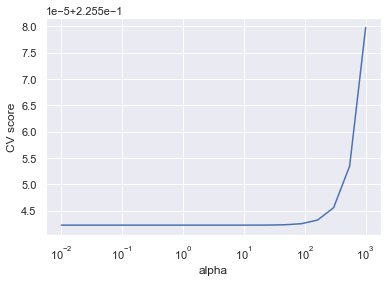

In [368]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# выделяем численные столбцы
numeric_data = X_valid.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_valid[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_valid)


alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_train_scaled, y_valid)

best_alpha_ridge = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Best alpha = 0.0100


Text(0, 0.5, 'CV score')

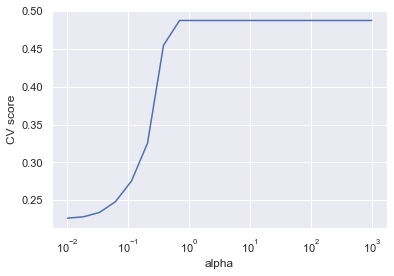

In [380]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# выделяем численные столбцы
numeric_data = X_valid.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_valid[numeric_features])

model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_valid)


alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_train_scaled, y_valid)

best_alpha_lasso = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [371]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha_ridge))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test RMSLE = %.4f" % np.sqrt(mean_squared_log_error(y_test, y_pred)))

Test RMSLE = 0.0744


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [384]:
model_lasso.coef_.round()

array([ 0.,  0.,  0.,  0., -0., -0., -0.])

<span style='color:#2E8B57'> 
    

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

### Задание 15 (1 балл)
Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

#### Вопрос 
Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### Задание 16 (бонус, 1 балл)
Где, как не для нашей задачи, считать манхэттенское расстояние?

#### Вопрос 
Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### Задание 17 (бонус, 2 балла)
Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.